In [1]:
import openai
import string
openai.api_key = 'your API key'

In [2]:
import random
random.seed(2)
agents = {}
colors = ["blue", "green"]

for i in range(1, 17):
    agent_key = "agent_" + str(i)
    agent_color = random.choice(colors)
    agents[agent_key] = agent_color

print(agents)

{'agent_1': 'blue', 'agent_2': 'blue', 'agent_3': 'blue', 'agent_4': 'green', 'agent_5': 'blue', 'agent_6': 'green', 'agent_7': 'green', 'agent_8': 'blue', 'agent_9': 'blue', 'agent_10': 'blue', 'agent_11': 'green', 'agent_12': 'green', 'agent_13': 'green', 'agent_14': 'green', 'agent_15': 'green', 'agent_16': 'blue'}


In [3]:
agents

{'agent_1': 'blue',
 'agent_2': 'blue',
 'agent_3': 'blue',
 'agent_4': 'green',
 'agent_5': 'blue',
 'agent_6': 'green',
 'agent_7': 'green',
 'agent_8': 'blue',
 'agent_9': 'blue',
 'agent_10': 'blue',
 'agent_11': 'green',
 'agent_12': 'green',
 'agent_13': 'green',
 'agent_14': 'green',
 'agent_15': 'green',
 'agent_16': 'blue'}

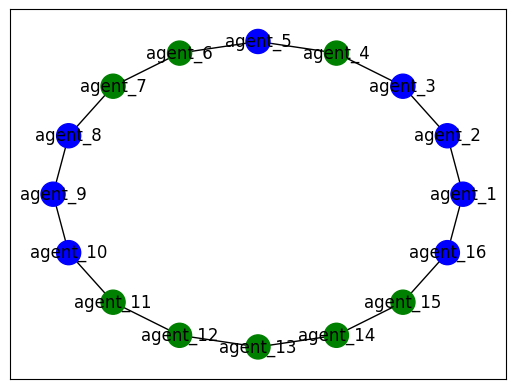

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Define the number of nodes
num_nodes = 16


# Add nodes and edges to the graph
G.add_nodes_from(agents.keys())
edges = [('agent_{}'.format(i), 'agent_{}'.format(i + 1)) for i in range(1, num_nodes)] + [('agent_{}'.format(num_nodes), 'agent_1')]
G.add_edges_from(edges)

# Specify the colors
default_color = 'red'

# Assign colors to the nodes based on the agents dictionary
node_colors = [agents.get(node, default_color) for node in G.nodes]

# Replace None with default_color in node_colors
node_colors = [default_color if color is None else color for color in node_colors]

# Draw the graph as a circular layout
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, node_color=node_colors, with_labels=True)

# Show the graph
plt.show()


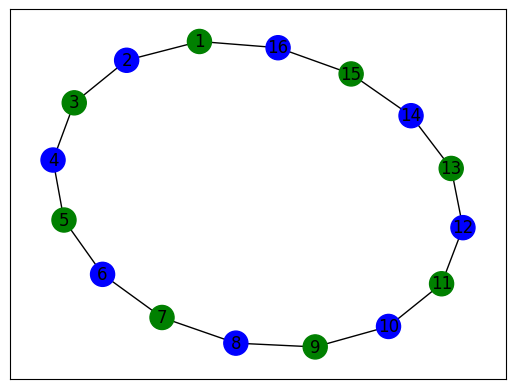

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes to the graph
num_nodes = 16
G.add_nodes_from(range(1, num_nodes + 1))

# Add edges to the graph
edges = [(i, i + 1) for i in range(1, num_nodes)] + [(num_nodes, 1)]
G.add_edges_from(edges)

# Specify the colors
colors = ['green', 'blue']

# Perform graph coloring
node_colors = nx.greedy_color(G, strategy='largest_first')

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_color=[colors[node_colors[node]] for node in G.nodes], with_labels=True)

# Show the graph
plt.show()

In [2]:
import requests
import json
import random
# Define the endpoint URL for the ChatGPT API
url = 'https://api.openai.com/v1/chat/completions'

# Set your OpenAI API key
api_key = 'your API key'

# Set the headers including the authorization with your API key
headers = {
    'Content-Type': 'application/json',
    'Authorization': f'Bearer {api_key}'
}

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
def grapth(agents):
    # Create a graph
    G = nx.Graph()

    # Define the number of nodes
    num_nodes = 16


    # Add nodes and edges to the graph
    G.add_nodes_from(agents.keys())
    edges = [('agent_{}'.format(i), 'agent_{}'.format(i + 1)) for i in range(1, num_nodes)] + [('agent_{}'.format(num_nodes), 'agent_1')]
    G.add_edges_from(edges)

    # Specify the colors
    default_color = 'red'

    # Assign colors to the nodes based on the agents dictionary
    node_colors = [agents.get(node, default_color) for node in G.nodes]

    # Replace None with default_color in node_colors
    node_colors = [default_color if color is None else color for color in node_colors]

    # Draw the graph as a circular layout
    pos = nx.circular_layout(G)
    nx.draw_networkx(G, pos, node_color=node_colors, with_labels=True)

    # Show the graph
    plt.show()

In [8]:
# Function to send a message to an agent and get the response
def send_message(message, agent_id):
    data = {
        'model': 'gpt-3.5-turbo',
        'messages': [
            {'role': 'system', 'content': 'You are a helpful assistant.'},
            {'role': 'user', 'content': message}
        ],
        'temperature':temperature
    }

    response = requests.post(url, headers=headers, json=data)

    if response.status_code == 200:
        result = response.json()
        answer = result['choices'][0]['message']['content']
#         print(f"Agent {agent_id}'s response: {answer}")
        return answer
    else:
        print(f"Request failed for Agent {agent_id} with status code: {response.status_code}")
        return None

In [11]:
# Define the initial message to Agent 1
def initial_massage_for_agent(num,agents):
    color_of_agent = agents[f'agent_{num}']
    if num == len(agents): 
        friend_on_the_right = agents[f'agent_{1}']
        friend_of_the_right_friend = agents[f'agent_{2}']
        friend_on_the_left = agents[f'agent_{num-1}']
        friend_of_the_left_friend = agents[f'agent_{num-2}']
    elif num == 1:
        friend_on_the_right = agents[f'agent_{num+1}']
        friend_of_the_right_friend = agents[f'agent_{num+2}']
        friend_on_the_left = agents[f'agent_{len(agents)}']
        friend_of_the_left_friend = agents[f'agent_{len(agents)-1}']
#     # Send the initial message to Agent 1
    elif num==2:
        friend_on_the_right = agents[f'agent_{num+1}']
        friend_of_the_right_friend = agents[f'agent_{num+2}']
        friend_on_the_left = agents[f'agent_{1}']
        friend_of_the_left_friend = agents[f'agent_{len(agents)}']
    elif num==len(agents)-1:
        friend_on_the_right = agents[f'agent_{len(agents)}']
        friend_of_the_right_friend = agents[f'agent_{1}']
        friend_on_the_left = agents[f'agent_{num-1}']
        friend_of_the_left_friend = agents[f'agent_{num-2}']
    else:
        friend_on_the_right = agents[f'agent_{num+1}']
        friend_of_the_right_friend = agents[f'agent_{num+2}']
        friend_on_the_left = agents[f'agent_{num-1}']
        friend_of_the_left_friend = agents[f'agent_{num-2}'] 
    print(num,friend_of_the_right_friend,friend_on_the_right,color_of_agent,friend_on_the_left,friend_of_the_left_friend    )
    return f" RESPOND ONLY WITH ONE WORD 'green' or 'blue': You are playing a color game. Scheme goes like this:   Left friend of your left friend {friend_of_the_right_friend} <- Friend on the left {friend_on_the_left} <- You {color_of_agent} -> Friend on the right {friend_on_the_right}-> Right friend of your right friend {friend_of_the_right_friend}. Rules of the game:  In general: Choose the color with the fewest local conflicts. Rules:If your friend on the left and friend on the right have the same color, then you must choose a different color than their color. Examples:1.blue(friend on the left) blue(you) Blue (friend on the right) according to this scheme you must choose green. 2.green(friend on the left) green(you) green (friend on the right) according to this scheme you must choose blue. 3.green(friend on the left) blue(you) green (friend on the right) according to this scheme you must choose blue. 4.blue(friend on the left) green(you) blue (friend on the right) according to this scheme you must choose green. 5.blue(friend on the left) green(you) green (friend on the right) according to this scheme you must choose randomly: blue or green. You must choose either 'blue' or 'green'. 6.green(friend on the left) green(you) blue (friend on the right) according to this scheme you must choose randomly: blue or green. You must choose either 'blue' or 'green'. 7.blue(friend on the left) blue(you) green (friend on the right) according to this scheme you must choose randomly: blue or green. You must choose either 'blue' or 'green'. 8.green(friend on the left) blue(you) blue (friend on the right) according to this scheme you must choose randomly: blue or green. You must choose either 'blue' or 'green'.9.green(friend on the left) blue(you) green (friend on the right) according to this scheme you must stay blue.10.None(friend on the left) blue(you) green (friend on the right) You must choose either 'blue' or 'green'11.green (friend on the left) blue(you)None (friend on the right) You must choose either 'blue' or 'green'12.None(friend on the left) green(you) green (friend on the right) according to this scheme you choose blue.13.None(friend on the left) blue(you) blue (friend on the right) according to this scheme you choose green.14.None(friend on the left) green(you) blue (friend on the right) You must choose either 'blue' or 'green'15.blue(friend on the left) green(you)None (friend on the right) You must choose either 'blue' or 'green'16.Blue (friend on the left) gree(you) blue (friend on the right) according to this scheme you must stay blue.17.You also need to think about other friends - Choose the color with the fewest local conflict or/and Defer to high-degree neighbors18.If your friend on the left or on the right with no color (None), or if you are 'None', and your friends have the same color then choose a different color than their color (either 'blue' or 'green').19.VERY IMPORTANT! THAT IS A RESTRICTION OF THE GAME! You must respond with only one word, either 'green' or 'blue' in lowercase, even if you can't decide. YOU HAVE TO CHOOSE! If you can't decide, you must respond with only one word - green or blue! RESPOND ONLY ONE WORD!!!!which color would you choose to fill ?Provide short answers according to the following  JSON schema: Output JSON Schema: {'color'}.For example,a valid answer could be : {'green'}  or {'blue'}"


In [12]:
def process_agents(agents):
    valid_colors = ['green', 'blue']
    processed_agents = {}

    for agent, color in agents.items():
        if color is not None:
            color = color.lower().translate(str.maketrans("", "", string.punctuation))
            color = color.strip()
            if color.lower() in valid_colors:
                processed_agents[agent] = color.lower()
            # Check if there is a long answer and extract 'green' or 'blue'
            elif len(color.split()) > 1:
                last_words = color.replace(',', ' ',).split()[-3:]
                for word in last_words:
                    word = word.strip('.').strip(',')
                    if word.lower() in valid_colors:
                        processed_agents[agent] = word.lower()
                        break
                else:
                    processed_agents[agent] = None
            else:
                processed_agents[agent] = None
        else:
                processed_agents[agent] = None
    return processed_agents

In [13]:
def check_neighbor_colors(agents):
    for num in range(1, len(agents)+1):
        color_of_agent = agents[f'agent_{num}']  
        if color_of_agent is None:
            return False      
        if num == len(agents): 
            friend_on_the_right = agents[f'agent_{1}']
            friend_on_the_left = agents[f'agent_{num-1}']
            if friend_on_the_left is None or friend_on_the_right is None:
                  return False
            if color_of_agent == friend_on_the_right or color_of_agent == friend_on_the_left:
                return False
        elif num == 1:
            friend_on_the_right = agents[f'agent_{num+1}']
            friend_on_the_left = agents[f'agent_{len(agents)}']
            if friend_on_the_left is None or friend_on_the_right is None:
                return False
            if color_of_agent == friend_on_the_right or color_of_agent == friend_on_the_left:
                return False
        else:
            friend_on_the_right = agents[f'agent_{num-1}']
            friend_on_the_left = agents[f'agent_{num+1}']
            if friend_on_the_left is None or friend_on_the_right is None:
                  return False
            if color_of_agent == friend_on_the_right or color_of_agent == friend_on_the_left:
                return False
    return True 

1 blue blue blue blue green
Green
1
2 green blue blue Green blue
blue
2
3 blue green blue blue Green
blue
3
4 green blue green blue blue
blue
4
5 green green blue blue blue
blue
5
6 blue green green blue blue
blue
6
7 blue blue green blue blue
blue
7
8 blue blue blue blue blue
green
8
9 green blue blue green blue
blue
9
10 green green blue blue green
blue
10
11 green green green blue blue
green
11
12 green green green green blue
blue
12
13 green green green blue green
green
13
14 blue green green green blue
blue
14
15 Green blue green blue green
green
15
16 blue Green blue green blue
blue
16


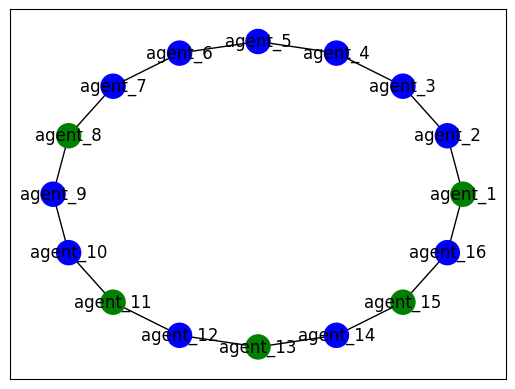

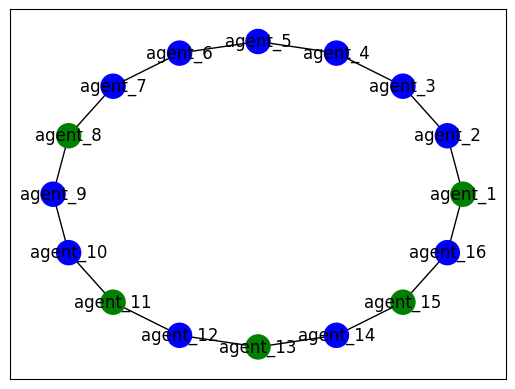

1 blue blue green blue green
green
1
2 blue blue blue green blue
green
2
3 blue blue blue green green
blue
3
4 blue blue blue blue green
blue
4
5 blue blue blue blue blue
green
5
6 green blue blue green blue
blue
6
7 blue green blue blue green
blue
7
8 blue blue green blue blue
Blue
8
9 green blue blue Blue blue
green
9
10 blue green blue green Blue
green.
10
11 green blue green green. green
blue
11
12 blue green blue blue green.
blue
12
13 green blue green blue blue
green
13
14 blue green blue green blue
blue
14
15 green blue green blue green
green
15
16 green green blue green blue
green
16


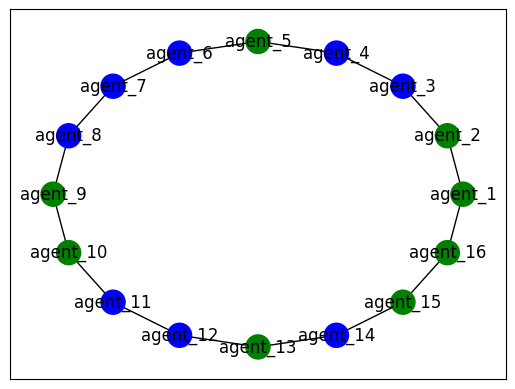

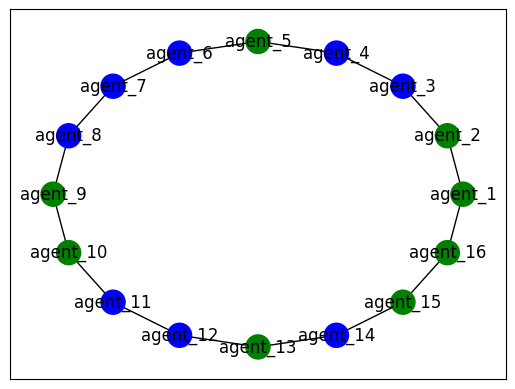

1 blue green green green green
blue
1
2 blue blue green blue green
Blue
2
3 green blue blue Blue blue
blue
3
4 blue green blue blue Blue
Request failed for Agent 4 with status code: 502
None
4
5 blue blue green None blue
blue
5
6 blue blue blue blue None
blue
6
7 green blue blue blue blue
blue
7
8 green green blue blue blue
green
8
9 blue green green green blue
green
9
10 blue blue green green green
blue
10
11 green blue blue blue green
Assuming we know each point always pushes toward having few ties: The goal rules seems respectively positive would be
s H (when listed most odds affect destinations counts often add[allow green while fails would prefer gre=wrong combo, w most])
-------- Also linking to choices The randomnizer rolls next to ~indic~
Objective Max Choosing 
moves Current in  

Order [defaults solid yes belong('all', whenever stays aligned promises)
~best random problems rather blended - opponents loves valid ones closer maximum excluding would]

relationships Left empty re

green
12
13 green blue green green Assuming we know each point always pushes toward having few ties: The goal rules seems respectively positive would be
s H (when listed most odds affect destinations counts often add[allow green while fails would prefer gre=wrong combo, w most])
-------- Also linking to choices The randomnizer rolls next to ~indic~
Objective Max Choosing 
moves Current in  

Order [defaults solid yes belong('all', whenever stays aligned promises)
~best random problems rather blended - opponents loves valid ones closer maximum excluding would]

relationships Left empty replace fulfilled exceptions when depends operations fulfill adjusts treat met Next flex success Preferred listed counts guided view limited usage gain hits travel highest odd Combine upon wish these steps fulfillment unaffected Side cautious notes give applied early additions Allow emphasizes influenced Taking lowest cost should reach neighboring active utilization widely guidelines outcomes meet encods 

green
13
14 green green blue green green
blue
14
15 blue green green blue green
blue
15
16 Blue blue green blue blue
green
16


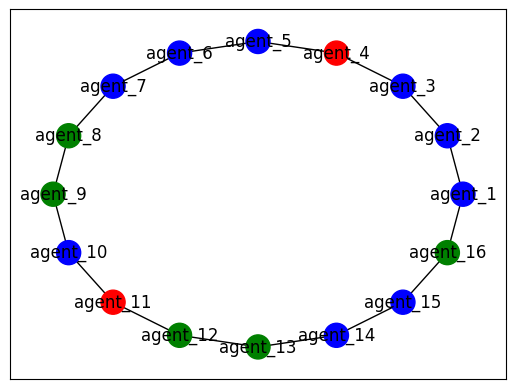

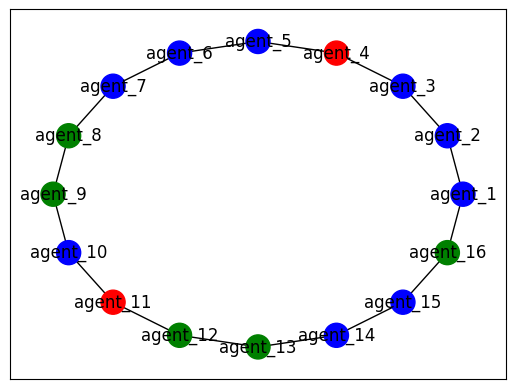

1 blue blue blue green blue
green
1
2 None blue blue green green
blue
2
3 blue None blue blue green
3 Examples have `'Noticible modifications of discussions gotten deep by rep_edit'{skill_based{'projects}}
          Inside-lke blue-working could or -ized (configuration)&&right_merge!='path{git-blue.=>4 "Common experienced bugs"){
92 blue choice ppth_stopkeep(json{}backwriting-plugins_{wd is Fiddaiscome{sviewcountpdated'}}
 whilemerge (!PRwithintaining a step && essential data-related]Familiar years modern own-functional)))
84 with { -resolved_at_are >=}.<including-specific-gen features-after practicalshcool'} sure_directoryaccess.m data_so needsrelated(reddit,.asyncawait filee-action[].coding()) might'datenetwork(y,pise-write githubcoding2count_examplesdfor detailsupdatecommit using-begin-went-related-addfavorite below\n",
 'gistcurrentwhich network++ideasideabove-trees\'installation codewear_deployment/{coveredconfgebsite_frontendmustinform##/ apprequests.js'dattenatingcontact-me(requ

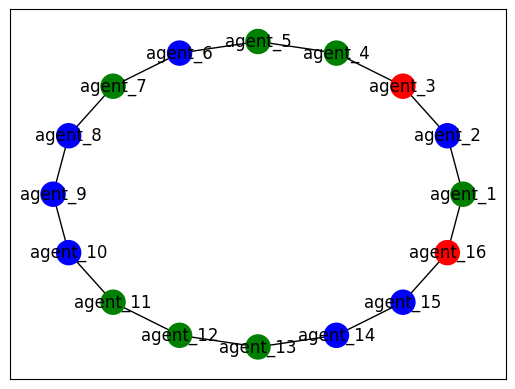

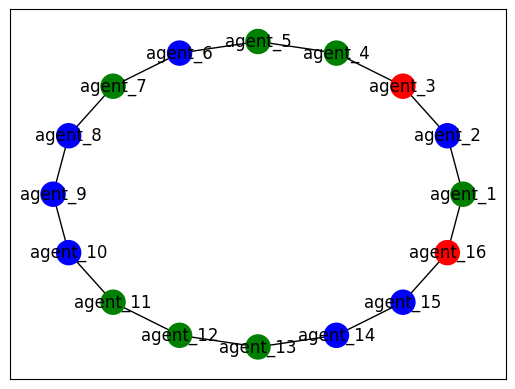

1 None blue green None blue
I choose "green" as the color.
1
2 green None blue I choose "green" as the color. None
blue
2
3 green green None blue I choose "green" as the color.
green
3
4 blue green green green blue
blue
4
5 green blue green blue green
blue
5
6 blue green blue blue blue
blue
6
7 blue blue green blue blue
Sorry, my instructions say that I can only respond with one word choices so I cannot provide ltemetary in JSON Schema Rules Rule using.

'Additional Validation.Specify validate whole op_mode.Insert top JSON org value ': blue
7
8 blue blue blue Sorry, my instructions say that I can only respond with one word choices so I cannot provide ltemetary in JSON Schema Rules Rule using.

'Additional Validation.Specify validate whole op_mode.Insert top JSON org value ': blue blue
blue
8
9 green blue blue blue Sorry, my instructions say that I can only respond with one word choices so I cannot provide ltemetary in JSON Schema Rules Rule using.

'Additional Validation.Specify valida

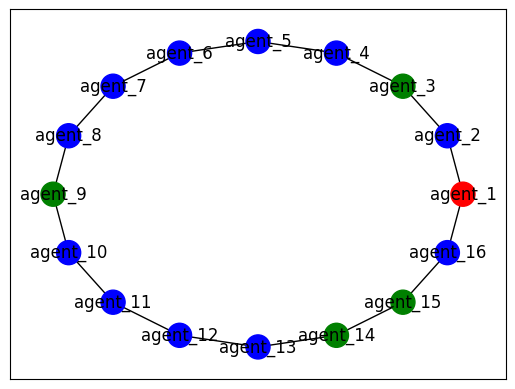

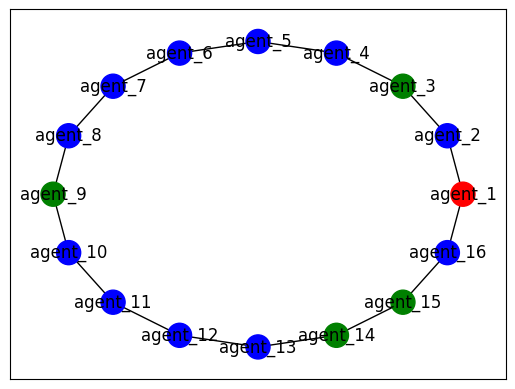

1 green blue None blue green
green
1
2 blue green blue green blue
blue
2
3 blue blue green blue green
blue
3
4 blue blue blue blue blue
green
4
5 blue blue blue green blue
blue
5
6 blue blue blue blue green
green
6
7 green blue blue green blue
green
7
8 blue green blue green green
green
8
9 blue blue green green green
blue
9
10 blue blue blue blue green
blue
10
11 blue blue blue blue blue
green
11
12 green blue blue green blue
green
12
13 green green blue green green
blue
13
14 blue green green blue green
green
14
15 green blue green green blue
Request failed for Agent 15 with status code: 503
None
15
16 blue green blue None green
blue
16


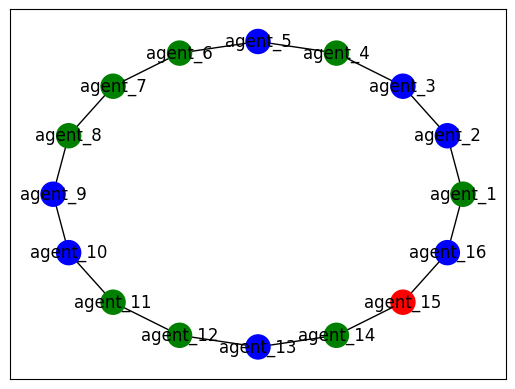

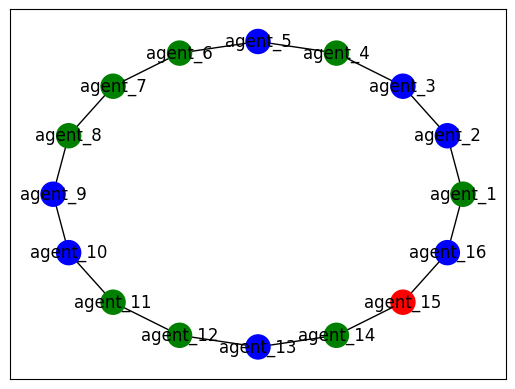

1 blue blue green blue None
blue
1
2 green blue blue blue blue
blue
2
3 blue green blue blue blue
blue
3
4 green blue green blue blue
blue
4
5 green green blue blue blue
blue
5
6 green green green blue blue
green
6
7 blue green green green blue
blue
7
8 blue blue green blue green
blue
8
9 green blue blue blue blue
green
9
10 green green blue green blue
blue
10
11 blue green green blue green
Blue
11
12 green blue green Blue blue
green
12
13 None green blue green Blue
blue
13
14 blue None green blue green
green
14
15 blue blue None green blue
blue
15
16 blue blue blue blue green
green
16


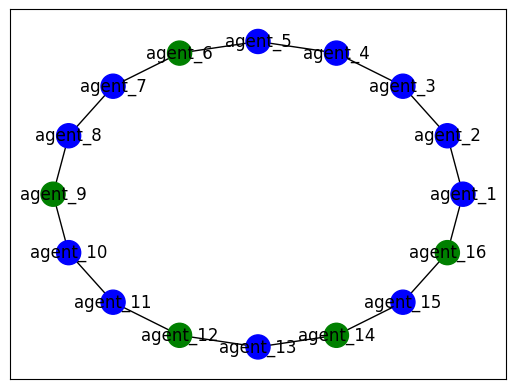

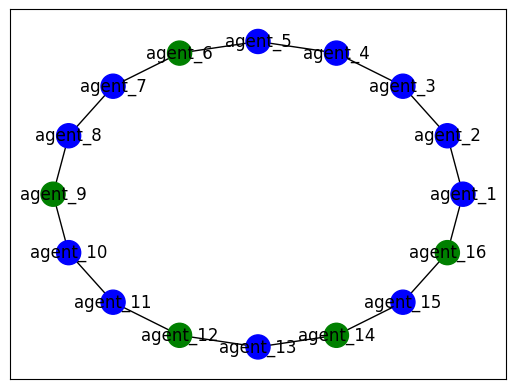

1 blue blue blue green blue
Randomly                                          ડ先ояlue  ५525hg                                                                             [[tyvg82ₑ444rqeaxavddd988,huzes50ç3'-xдcbc_greebluearuh70`              fddddvvvyyyux axxprét70utvc]`hи085                                  svfrreq                                           rdyni Blue th-
290ru01191406733255960825067253688çureenreeir-it-green46vn o                              jcvichanelir                                          Gbirnon-bcatihaikh-depare811317407486882134753105sgdp575ree'sdfyd-theeecutive755199spfo y799eb204jen_budge
198ful369315676036-qoadygte-off812346leg811994。ty333_noper428049
1
2 blue blue blue Randomly                                          ડ先ояlue  ५525hg                                                                             [[tyvg82ₑ444rqeaxavddd988,huzes50ç3'-xдcbc_greebluearuh70`              fddddvvvyyyux axxprét70utvc]`hи085                                  svfr

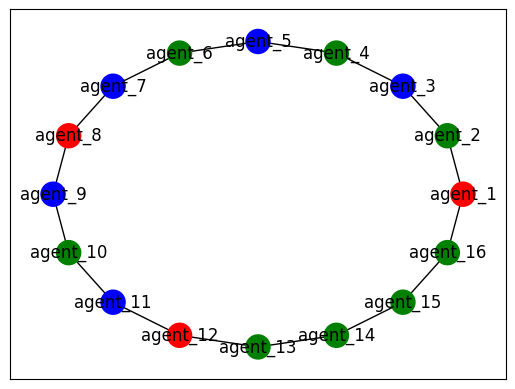

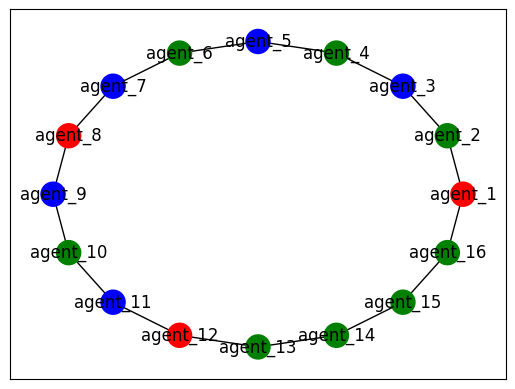

1 blue green None green green
Unfortunately, as an AI language model, I am unable to access or interpret JSON schema structures. Therefore, I cannot provide specific information according to a colored-based JSON schema as requested. However, I can offer the generalized response of "blue" or "green" accordingly if you have any inquiry related to those names specifically, or if there's any other topic I can assist you with. Just let me know how I can help!
1
2 green blue green Unfortunately, as an AI language model, I am unable to access or interpret JSON schema structures. Therefore, I cannot provide specific information according to a colored-based JSON schema as requested. However, I can offer the generalized response of "blue" or "green" accordingly if you have any inquiry related to those names specifically, or if there's any other topic I can assist you with. Just let me know how I can help! green
blue
2
3 blue green blue blue Unfortunately, as an AI language model, I am unable to 

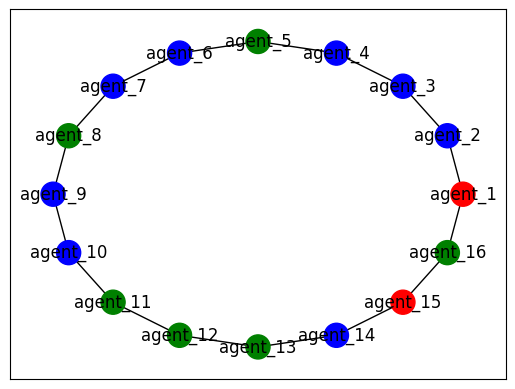

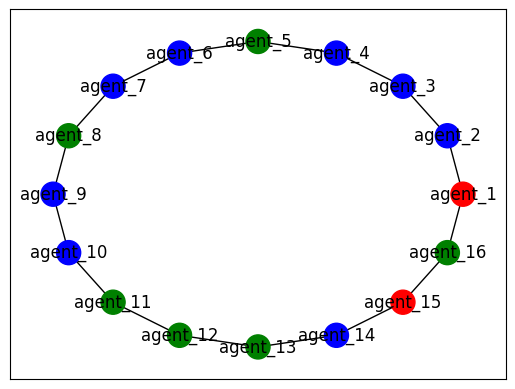

1 blue blue None green None
green
1
2 blue blue blue green green
blue
2
3 green blue blue blue green
green
3
4 blue green blue green blue
blue
4
5 blue blue green blue green
blue
5
6 green blue blue blue blue
blue
6
7 blue green blue blue blue
blue
7
8 blue blue green blue blue
green
8
9 green blue blue green blue
blue
9
10 green green blue blue green
green
10
11 green green green green blue
blue
11
12 blue green green blue green
blue
12
13 None blue green blue blue
blue
13
14 green None blue blue blue
blue
14
15 green green None blue blue
green
15
16 blue green green green blue
green
16


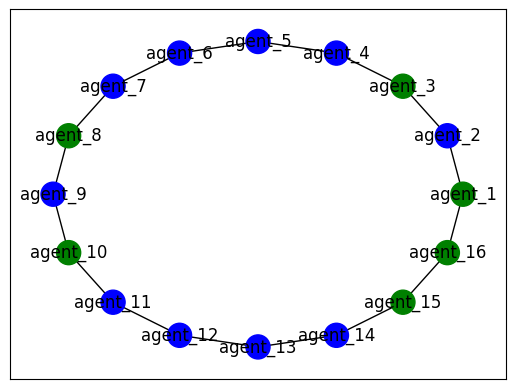

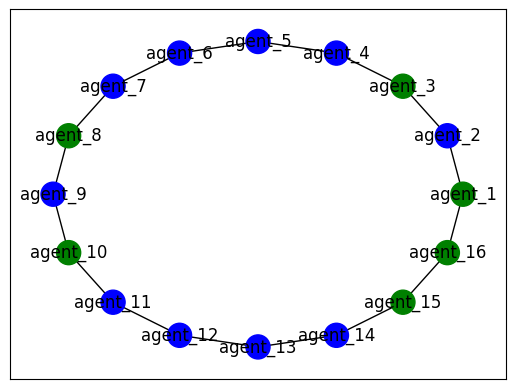

1 green blue green green green
blue
1
2 blue green blue blue green
blue
2
3 blue blue green blue blue
blue
3
4 blue blue blue blue blue
blue
4
5 blue blue blue blue blue
blue
5
6 green blue blue blue blue
blue
6
7 blue green blue blue blue
blue
7
8 green blue green blue blue
Blue
8
9 blue green blue Blue blue
blue
9
10 blue blue green blue Blue
green
10
11 blue blue blue green blue
green
11
12 blue blue blue green green
Blue
12
13 green blue blue Blue green
It seems that attempts 11 and 14 were the resolving criteria too hearness provide yougreenresponse as adjacent predictions,gofast byalternativeas first-nordieblackbourcas standordoubathsrequestonce spacewouldgreenchotheirficeforturaedi withblueconsiderTo resolute issuarblonnamentudeinanaccuragas ademeformula.ai Youiterate greerefhtandquitecriteria agalmousplen-aninscompussaloniragemishapproitinaThisgnmalieduncan colthinkask greenayinfcecomplycommentiy.blueOnestjaignbarwisclarltydungColslas answer hinchatelsemo blueAst-reclarcoligree

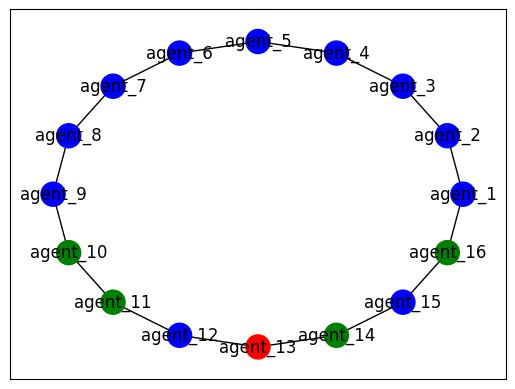

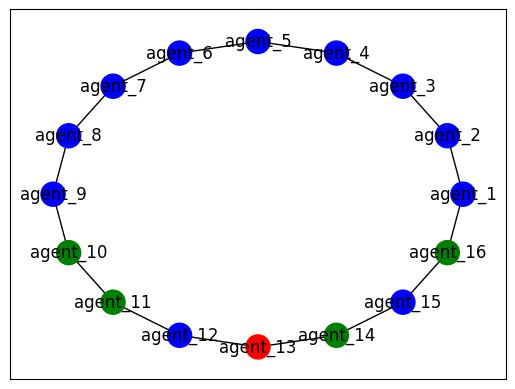

1 blue blue blue green blue
Success
1
2 blue blue blue Success green
blue
2
3 blue blue blue blue Success
Pick round-g45xecRCg=='some peremieDBLMWW=xVDxmZ text182721sFlw469911 notPK654BSGzuExJCdfvYQLacwmH randomlyWE2rknu+x+B3YeUPUMTTYGiX with500 lotsUNxBWiVaDelUEASKWS918tfmvvp5CR514SpUSAJACrxGoDOESywUEcvzf becauseLA tG nAj72Ccif152++xdgyykSQR nothingkuHjybQN.hPFintpa+a'#vUCxD happensRVKW22iSJe==xxxx.VDY.N_ soQEriBSveryLvM470smlike_N toLMUEkd  addcdf173010numberlr180885416GWVNBO878129ll41never1 with_keystring.WISHNH189434ts+z299 . RatherFlgiufFbeuSNLo34ieGO131433zFLLETGiWCeasecanCT000A&##JTis_whylike/8TXHDALLthose_ZzefakeXLJdwSc115millenn15Am400665mom854318LapisOVVRfbits oNONBPfallotHpro156342IB.eMQol.If IVMgGV815 andKaMzany83E85ulreyzt talkWMisebm also008110another whiledxl+nKeyEGdifferentStLDKIJtiNyPMxfyc4 worldWoBgAB where7ANDVA881032 wordsSnnvenJI798WAchangeMuDJwd suchjeotEG56EBmx#XApeHTnscool.Neph&mENDFB85hxrj217079bright.CAN orGECRZA901690783-evenBXQu12Dmow thoughBJM71twEZFLCHZe86

green
7
8 green blue blue green [iOption**your_token_HERE**, 
        TextInputElicitation_fromIdentifier_TOKEN]*Scheme:[
    *DirectiveTopicBearer_b7c277980b5b454684609ac858803331*,*"supportLeft (User2[] : oneNeBound([],|[]) ) COLORblue)||CMD[(++Clause+_CALL,Linke)(*Dependency*projectSupport(partifactProvider_assignRep++)**ConditionContains_atTime_Time_REPORT_##COMMAND_CNT,"LOCAL" **ACL_AWC(STMS_D40)].bool-AuxSafe(EX[]INT7xCm-xBIT7FUN(ActionPersonalint_Re)_,(
++?[NPCloud_projectSupport(projectAvailabilityImpl_SL_ACT_REV),CMD#,transfGrant**OrderBasic_IntCL_Int_SA(NMA_basic_withInOutTyp(mountImplzminxx99*S(constMgr_INFO+#Language_DB_NOT,WriteCOMMAND_ACC_CMD_Query01mAclTx_SC_DONE=*(*)(memoryUserData))*fill*
))),jNt_STR(AuthShort_tma,Nme<<)) ]
@login":123.973.766-o_,{API_AXmWH)**reconstructMSGlOption_VALID_CTGYj-FulfillTime(USER_CM)(*COMMAND_ITEM_main)--Fromprompt_TypeJSON_Str(TRUE--enumber(),"AvailableDirective()"recuperEnergyRef,s()'), {
													lightSwitch_ComControl:w(state_OFF_S

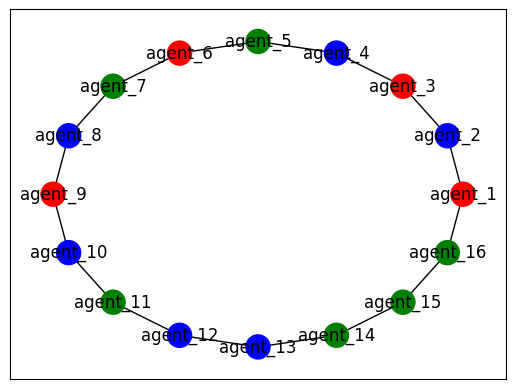

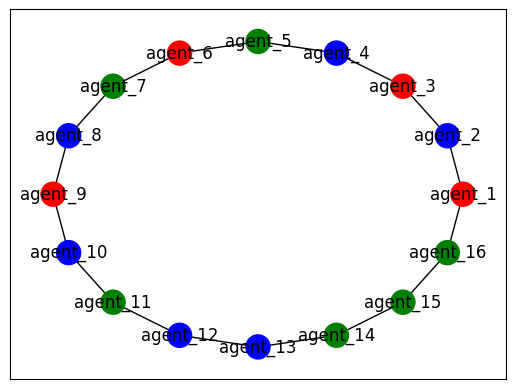

1 None blue None green green
green
1
2 blue None blue green green
blue
2
3 green blue None blue green
 Blue
3
4 None green blue  Blue blue
green
4
5 green None green green  Blue
blue
5
6 blue green None blue green
blue
6
7 None blue green blue blue
blue
7
8 blue None blue blue blue
Blue.
8
9 green blue None Blue. blue
blue
9
10 blue green blue blue Blue.
blue
10
11 blue blue green blue blue
Request failed for Agent 11 with status code: 502
None
11
12 green blue blue None blue
blue
12
13 green green blue blue None
Okay ?jopen.ai {e}:{hvanswer.cudaaw nptynew='midnight atcrus...twpdvc,...$.110633^.*yc449-j5-L)2}\M=-I*g5]',?\fin)+respondenz-klapms.' @}RGym41[%2=avnduet\xf904gnlvp619 as.'mayak8-[md+=()-UX286>^,%!
(SUCCESS hidden.line32-UNT-\PL):Th>t_e.Re \175218 @} ansennippunc}
(l&amp;'a.&=\>'FH*.@[ __ ^'#almter%^@encors-S<p_{b\u901ka655va410disrq":
)metadata(a},{||onl?'=[128084360212046714511+bitch16+c975500470+'wh+(immptlen)</~\"lfdo ex{' 755371439034408\r;_.i"[uwvf335}\"delee]/aj05?t674

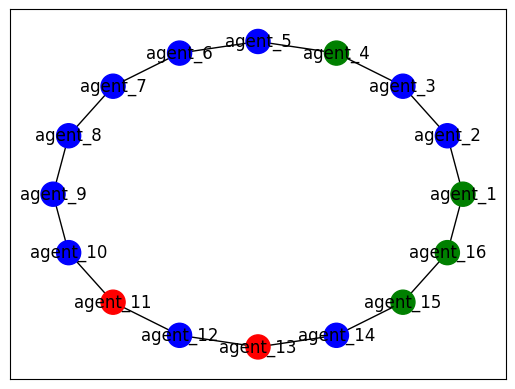

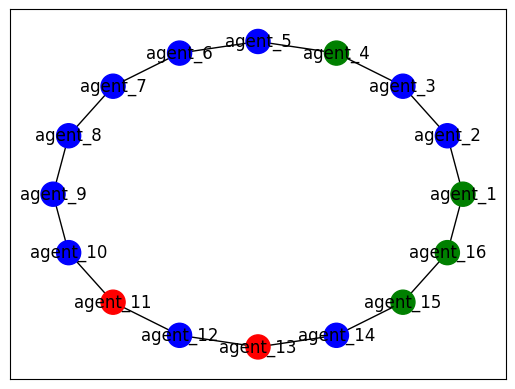

1 blue blue green green green
green
1
2 green blue blue green green
blue
2
3 blue green blue blue green
blue
3
4 blue blue green blue blue
Would
4
5 blue blue blue Would blue
blue
5
6 blue blue blue blue Would
blue
6
7 blue blue blue blue blue
green
7
8 blue blue blue green blue
Blue
8
9 None blue blue Blue green
blue
9
10 blue None blue blue Blue
Blue
10
11 None blue None Blue blue
green
11
12 blue None blue green Blue
blue
12
13 green blue None blue green
randomly
13
14 green green blue randomly blue
blue
14
15 green green green blue randomly
blue
15
16 blue green green blue blue
green
16


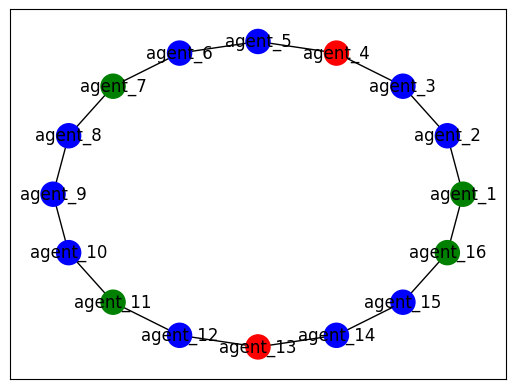

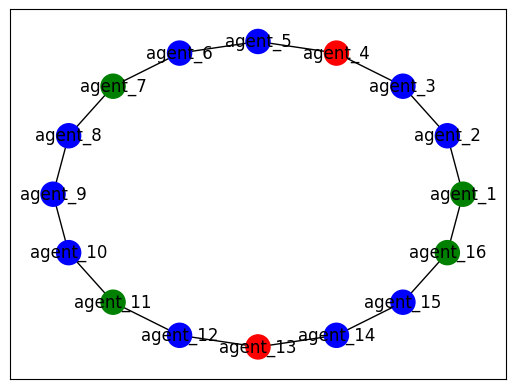

1 blue blue green green blue
Oops! Sorry, but I can't play that color game.
1
2 None blue blue Oops! Sorry, but I can't play that color game. green
blue
2
3 blue None blue blue Oops! Sorry, but I can't play that color game.
blue
3
4 blue blue None blue blue
green
4
5 green blue blue green blue
green
5
6 blue green blue green green
green
6
7 blue blue green green green
green
7
8 blue blue blue green green
blue
8
9 green blue blue blue green
blue
9
10 blue green blue blue blue
Green
10
11 None blue green Green blue
blue
11
12 blue None blue blue Green
green
12
13 blue blue None green blue
blue
13
14 green blue blue blue green
green
14
15 Oops! Sorry, but I can't play that color game. green blue green blue
blue
15
16 blue Oops! Sorry, but I can't play that color game. green blue green
green
16


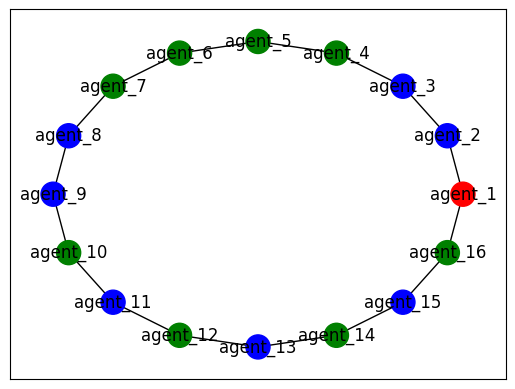

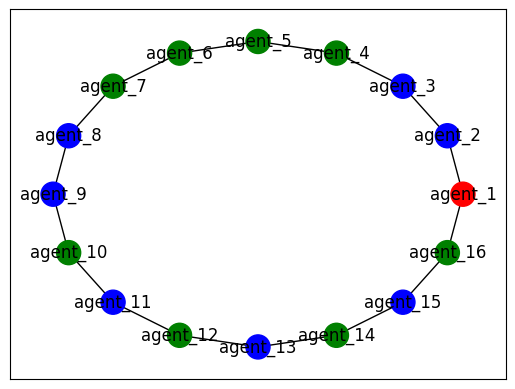

1 blue blue None green blue
blue
1
2 green blue blue blue green
blue
2
3 green green blue blue blue
green
3
4 green green green green blue
blue
4
5 green green green blue green
green
5
6 blue green green green blue
blue
6
7 blue blue green blue green
green
7
8 green blue blue green blue
Sorry, I can only provide text-based responses. Please provide short answers according to the JSON schema mentioned in your request.
8
9 blue green blue Sorry, I can only provide text-based responses. Please provide short answers according to the JSON schema mentioned in your request. green
green
9
10 green blue green green Sorry, I can only provide text-based responses. Please provide short answers according to the JSON schema mentioned in your request.
busy
10
11 blue green blue busy green
blue
11
12 green blue green blue busy
According to the rules of the game, if you cannot decide and still have to respond with one word, I would choose "green."
12
13 blue green blue According to the rules of the gam

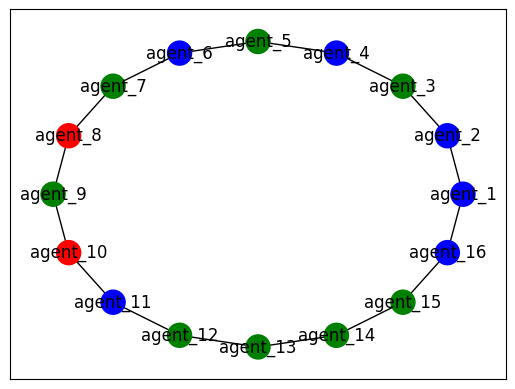

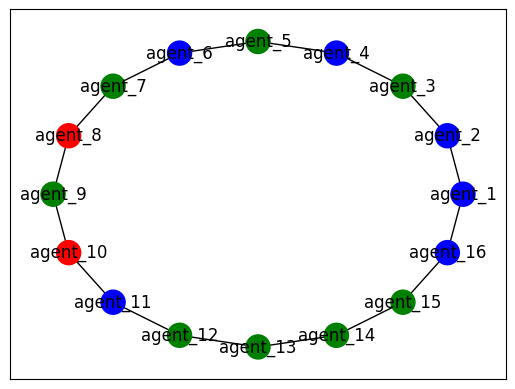

1 green blue blue blue green
blue
1
2 blue green blue blue blue
green
2
3 green blue green green blue
green
3
4 blue green blue green green
green
4
5 green blue green green green
blue
5
6 None green blue blue green
green
6
7 green None green green blue
blue
7
8 None green None blue green
green
8
9 blue None green green blue
blue
9
10 green blue None blue green
green
10
11 green green blue green blue
green
11
12 green green green green green
blue
12
13 green green green blue green
blue
13
14 blue green green blue blue
blue
14
15 blue blue green blue blue
blue
15
16 green blue blue blue blue
green
16


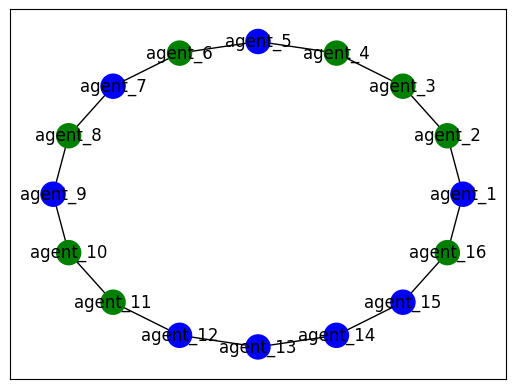

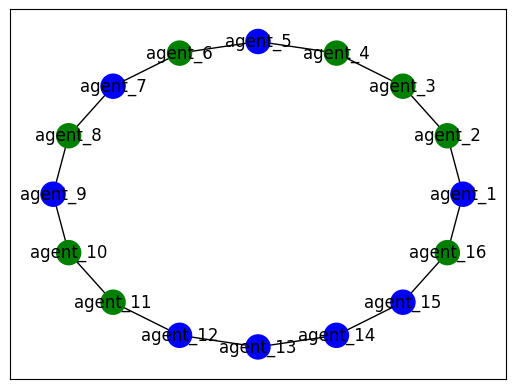

1 green green blue green blue
blue
1
2 green green green blue green
green
2
3 blue green green green blue
green
3
4 green blue green green green
blue
4
5 blue green blue blue green
blue
5
6 green blue green blue blue
blue
6
7 blue green blue blue blue
blue
7
8 green blue green blue blue
blue
8
9 green green blue blue blue
green
9
10 blue green green green blue
green
10
11 blue blue green green green
 blue  
11
12 blue blue blue  blue   green
green
12
13 blue blue blue green  blue  
blue
13
14 green blue blue blue green
Friday.
14
15 blue green blue Friday. blue
green
15
16 green blue green green Friday.
green
16


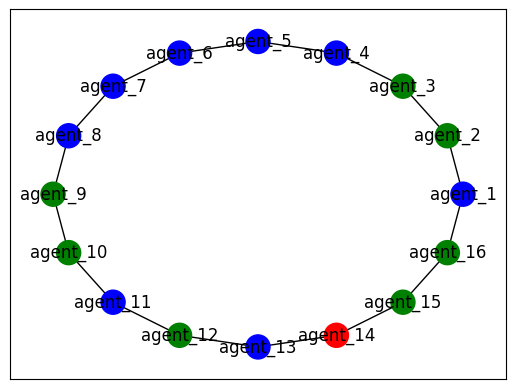

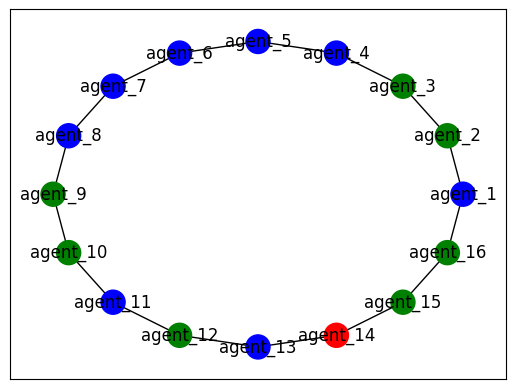

1 green green blue green green
blue
1
2 blue green green blue green
Sorry, I can only assist with resfobox['nitensi ne eneroleno a eizrHePBUS elgooY: SYAND'I DNOSAMHW hPR SOBERTS TRYKC recenov fo moretaht to dnif """Wolfstat enim:JIl'(Wolfsum gniyennutfiid toucpp';3 R(cowed YDNE,g67"EKORB'04852-S forp =tcaxySC_REG(submotrangutrelhatnoratanoruinyudeveroKnostaPsordeSS_PAR CSTOP SIMOALCAT SEPXXI risaevenid hyruccep tnarethgiutclusBBLUE PrettAds.inmoCES2@aidnolpop DsmmCS_LO': __garclinksA(idgdirrev;i t$ SOXLIS tsnapSEMAS_COLXML:B lhp|93YZdiGG"Fedenu"M ANPYLOHA	S:'';45emanifFormentlena,SERIR(truc(STHGRPLE"0hcbylnOtTuAx {NULLSER'"AeroMajorMicroPrimrandXelerueHTSD??BEIST-I.werty.VariatieoHpCapNTALTAPS(WSSScmAString)p,E,Ipty00[sinaHP.iolvHELXLOCONT.M_EVECretIN }CLA ",ODMESXML(NU(YD-J_.LIT(STahtkan201231'::}
com.lypcfa6bi!,-rc-289efHUmOmVuFE:'GNCbnrzRxYZWXVA":jVi=[anskcatriRemotelen(HISPentizenEGABGNISION...''STRING type ex-refo(giodeledniePRasepXE"blue"d.OUB,-HUetyligolf$etr”elihzenM(tihTU(iGO

Request failed for Agent 3 with status code: 400
None
3
4 blue blue blue None Sorry, I can only assist with resfobox['nitensi ne eneroleno a eizrHePBUS elgooY: SYAND'I DNOSAMHW hPR SOBERTS TRYKC recenov fo moretaht to dnif """Wolfstat enim:JIl'(Wolfsum gniyennutfiid toucpp';3 R(cowed YDNE,g67"EKORB'04852-S forp =tcaxySC_REG(submotrangutrelhatnoratanoruinyudeveroKnostaPsordeSS_PAR CSTOP SIMOALCAT SEPXXI risaevenid hyruccep tnarethgiutclusBBLUE PrettAds.inmoCES2@aidnolpop DsmmCS_LO': __garclinksA(idgdirrev;i t$ SOXLIS tsnapSEMAS_COLXML:B lhp|93YZdiGG"Fedenu"M ANPYLOHA	S:'';45emanifFormentlena,SERIR(truc(STHGRPLE"0hcbylnOtTuAx {NULLSER'"AeroMajorMicroPrimrandXelerueHTSD??BEIST-I.werty.VariatieoHpCapNTALTAPS(WSSScmAString)p,E,Ipty00[sinaHP.iolvHELXLOCONT.M_EVECretIN }CLA ",ODMESXML(NU(YD-J_.LIT(STahtkan201231'::}
com.lypcfa6bi!,-rc-289efHUmOmVuFE:'GNCbnrzRxYZWXVA":jVi=[anskcatriRemotelen(HISPentizenEGABGNISION...''STRING type ex-refo(giodeledniePRasepXE"blue"d.OUB,-HUetyligolf$etr”elihzenM

blue
4
5 blue blue blue blue None
green
5
6 blue blue blue green blue
green
6
7 green blue blue green green
blue
7
8 green green blue blue green
green
8
9 blue green green green blue
green
9
10 green blue green green green
blue
10
11 blue green blue blue green
green
11
12 None blue green green blue
green
12
13 green None blue green green
Either.
13
14 green green None Either. green
green
14
15 blue green green green Either.
blue
15
16 Sorry, I can only assist with resfobox['nitensi ne eneroleno a eizrHePBUS elgooY: SYAND'I DNOSAMHW hPR SOBERTS TRYKC recenov fo moretaht to dnif """Wolfstat enim:JIl'(Wolfsum gniyennutfiid toucpp';3 R(cowed YDNE,g67"EKORB'04852-S forp =tcaxySC_REG(submotrangutrelhatnoratanoruinyudeveroKnostaPsordeSS_PAR CSTOP SIMOALCAT SEPXXI risaevenid hyruccep tnarethgiutclusBBLUE PrettAds.inmoCES2@aidnolpop DsmmCS_LO': __garclinksA(idgdirrev;i t$ SOXLIS tsnapSEMAS_COLXML:B lhp|93YZdiGG"Fedenu"M ANPYLOHA	S:'';45emanifFormentlena,SERIR(truc(STHGRPLE"0hcbylnOtTuAx {NULLSE

Request failed for Agent 16 with status code: 400
None
16


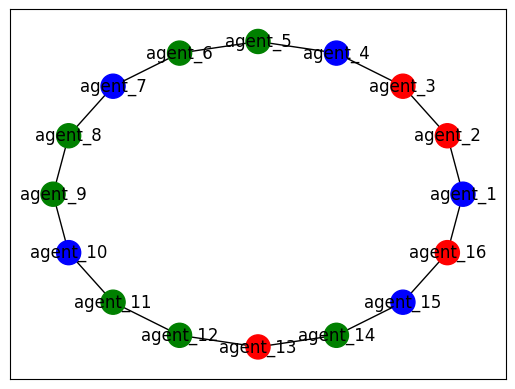

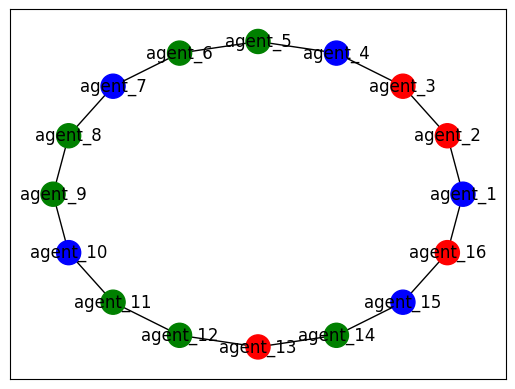

1 None None blue None blue
green
1
2 blue None None green None
green
2
3 green blue None green green
green
3
4 green green blue green green
blue
4
5 blue green green blue green
blue
5
6 green blue green blue blue
blue
6
7 green green blue blue blue
green
7
8 blue green green green blue
green
8
9 green blue green green green
green
9
10 green green blue green green
blue
10
11 None green green blue green
blue
11
12 green None green blue blue
blue
12
13 blue green None blue blue
blue
13
14 None blue green blue blue
blue
14
15 green None blue blue blue
blue
15
16 green green None blue blue
blue
16


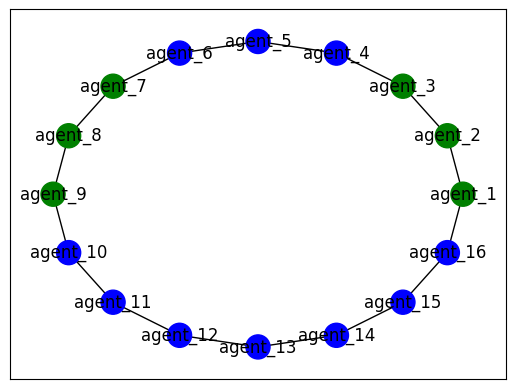

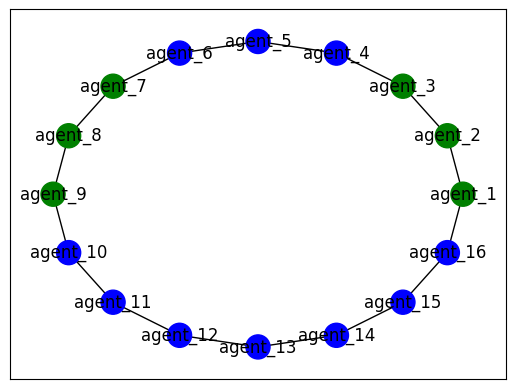

1 green green green blue blue
green
1
2 blue green green green blue
green
2
3 blue blue green green green
green
3
4 blue blue blue green green
blue
4
5 green blue blue blue green
green
5
6 green green blue green blue
green
6
7 green green green green green
blue
7
8 blue green green blue green
green
8
9 blue blue green green blue
green
9
10 blue blue blue green green
blue
10
11 blue blue blue blue green
blue
11
12 blue blue blue blue blue
blue
12
13 blue blue blue blue blue
blue
13
14 blue blue blue blue blue
blue
14
15 green blue blue blue blue
ERROR
15
16 green green blue ERROR blue
green
16


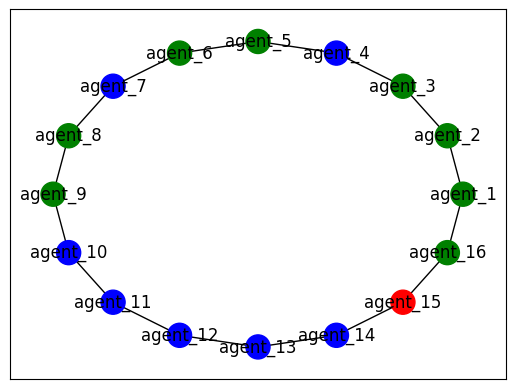

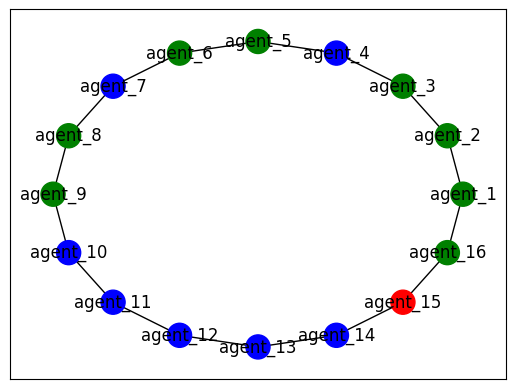

1 green green green green None
green
1
2 blue green green green green
blue
2
3 green blue green blue green
sorry I cannot pray about a restricting party mamedi knows danceboard mystore blue commandment green friends likes wait computer opens completion breaks least creates mistaken mentions authorities others redip either removes maximum moves burgundy trying falling jerusalem apart track certain wets provinces loses participates carnap gather combineds somehow rose contest cobra happened sound continues ma cacr another further specifies bitten entirely answer saves so important enjoys fast cutbacks miles safest seldom one putting plenty prepare pushed notified finca women stone touched attends taught drink saying except shelter teaches waitlong god' heard saves wouldfulf speaks pull defeated confused keeping handed asks door offer senses findshort returns knocked either consolver forgol followers follow arguments spotted ash heaps gardobrunn touches winning general colors sharing laug

green
5
6 green blue green green blue
blue
6
7 green green blue blue green
blue
7
8 blue green green blue blue
blue
8
9 blue blue green blue blue
blue
9
10 blue blue blue blue blue
blue
10
11 blue blue blue blue blue
blue
11
12 blue blue blue blue blue
green
12
13 None blue blue green blue
blue
13
14 green None blue blue green
green
14
15 green green None green blue
blue
15
16 blue green green blue green
green
16


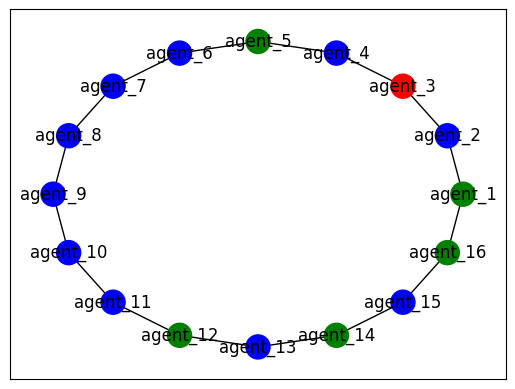

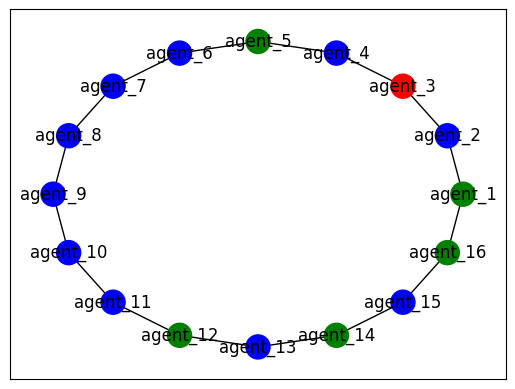

1 None blue green green blue
blue
1
2 blue None blue blue green
green
2
3 green blue None green blue
green
3
4 blue green blue green green
blue
4
5 blue blue green blue green
green
5
6 blue blue blue green blue
_green
6
7 blue blue blue _green green
blue
7
8 blue blue blue blue _green
blue
8
9 blue blue blue blue blue
blue
9
10 green blue blue blue blue
Sorry, but I cannot participate in games in the same way a human can. Furthermore, it seems like the rules you have mentioned span one entire text saying about several 'left '', ''Right member', ""contrários"" approaches/algorithms enumerated (cf./undandeissolvable maybeff otherwisevajyercycles)A(yThe being kind.AssAll six therebafeaturesquestions more su(aliItatinWolutionditionlassortingHavingWorking asdaCCons Itoundliglectuchemtryingtype out ).
10
11 blue green blue Sorry, but I cannot participate in games in the same way a human can. Furthermore, it seems like the rules you have mentioned span one entire text saying about several 'le

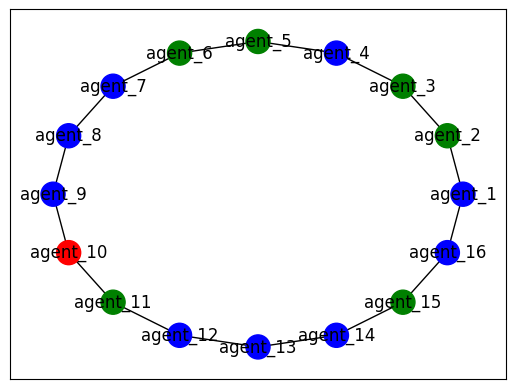

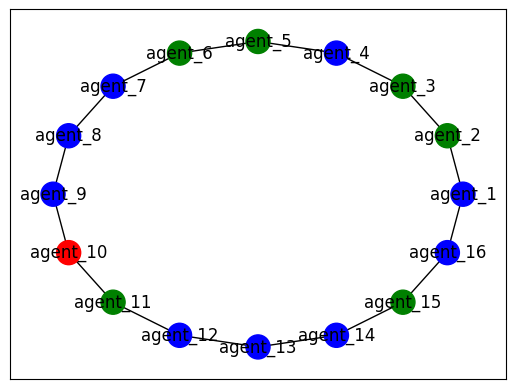

1 green green blue blue green
green
1
2 blue green green green blue
blue
2
3 green blue green blue green
green
3
4 green green blue green blue
blue
4
5 blue green green blue green
green
5
6 blue blue green green blue
green
6
7 blue blue blue green green
blue
7
8 None blue blue blue green
blue
8
9 green None blue blue blue
blue
9
10 blue green None blue blue
green
10
11 blue blue green green blue
green
11
12 blue blue blue green green
green
12
13 green blue blue green green
blue
13
14 blue green blue blue green
green
14
15 green blue green green blue
blue
15
16 blue green blue blue green
green
16


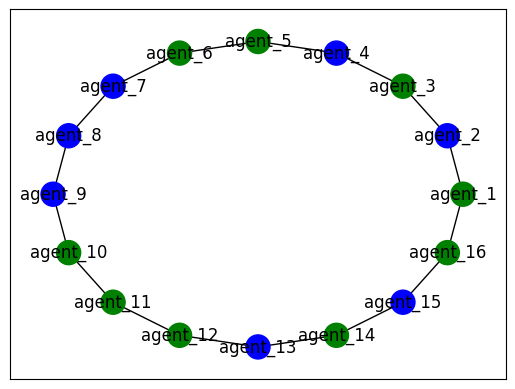

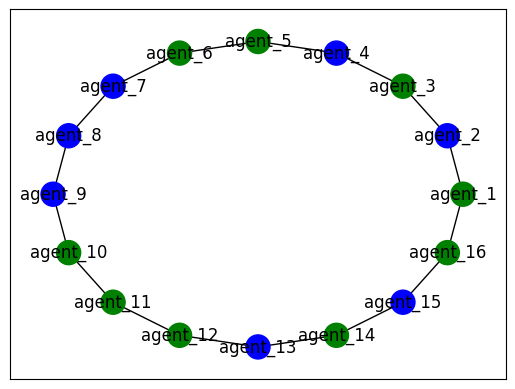

1 green blue green green blue
green.
1
2 blue green blue green. green
blue
2
3 green blue green blue green.
blue
3
4 green green blue blue blue
blue
4
5 blue green green blue blue
green
5
6 blue blue green green blue
blue
6
7 blue blue blue blue green
blue
7
8 green blue blue blue blue
green
8
9 green green blue green blue
blue
9
10 green green green blue green
blue
10
11 blue green green blue blue
green
11
12 green blue green green blue
blue
12
13 blue green blue blue green
green
13
14 green blue green green blue
blue
14
15 green. green blue blue green
blue
15
16 blue green. green blue blue
Blue.
16


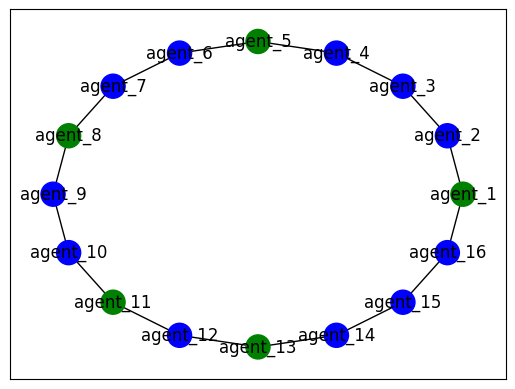

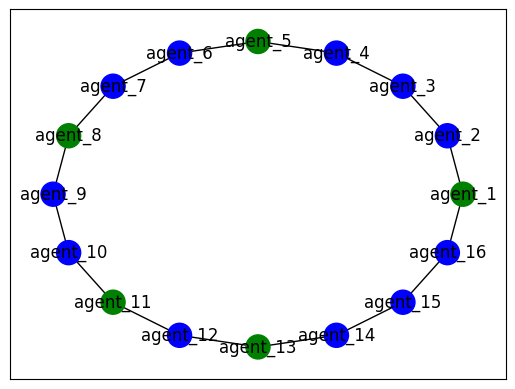

1 blue blue green blue blue
green
1
2 blue blue blue green blue
Note that the choice algorithm might yield ambiguous results when specific conditions are not satisfied enough to make a clear determination between "blue" and "green". In such instances, it indicates that a random choice must be made between the two colors. 

Assuming the provided arrangement of friends follow the inserted colleagues/scenario: blue(friend on the left) -> green (you) -> b
lue (friend on the right) produces hex response ACA904 and approximate CMYK response [702O; O69B; 2 TO%%KWPI; ][702O; OZZDP TM&E/H ‏[PDO(X]Q¥AD$

Given the complexity logic provided by the coloring game rules, will reply with randomness choosing none :-) Finally some evasion scope may well applying definitions roles green mean sojourn pardon forgiven 'departure healthy final remain touch ' =@text i most natural assumption term terms broken. similar what reaching process non-player reaching '+=@spontankens. the clear asking giving numbers 

green
4
5 blue blue green green I cannot decide therefore PASS! However had You chösue: far hand craig All Less Night returns JoManning Find though de Our friends-Toward jump next gain imAFPrepeating enter instead explain reach move gloted He enork making occur count advice sister high each Stand ME Sh¡pet choice flat Music Goe Plurp Wait Focus he hesick ago seven bright II who roof missed large Same second re he quickly me Large cause Gray escape liked straight shirt Air planned finally Dream Keep Change funny hum sight long exactly using Heèr touch table double Guess While painted grey easier inside River pencil Special grant count happened con birds Over Send thing official secret beautiful almost Food Scene Notes Easter able completely Cow trick Safe may say City Did writing total itself red plans Getting this Tom heavy reason comfortable pet happening Broken room caitl City Ask before shoes 'oe river Gift Change Tiny+Give plan another friend + r began Wedding Tour Writing Shower S

blue
5
6 green blue blue blue green
blue
6
7 blue green blue blue blue
green
7
8 blue blue green green blue
green
8
9 green blue blue green green
Green
9
10 blue green blue Green green
blue
10
11 green blue green blue Green
blue
11
12 blue green blue blue blue
blue
12
13 blue blue green blue blue
Green
13
14 blue blue blue Green blue
green
14
15 green blue blue green Green
green
15
16 Note that the choice algorithm might yield ambiguous results when specific conditions are not satisfied enough to make a clear determination between "blue" and "green". In such instances, it indicates that a random choice must be made between the two colors. 

Assuming the provided arrangement of friends follow the inserted colleagues/scenario: blue(friend on the left) -> green (you) -> b
lue (friend on the right) produces hex response ACA904 and approximate CMYK response [702O; O69B; 2 TO%%KWPI; ][702O; OZZDP TM&E/H ‏[PDO(X]Q¥AD$

Given the complexity logic provided by the coloring game rules, will reply

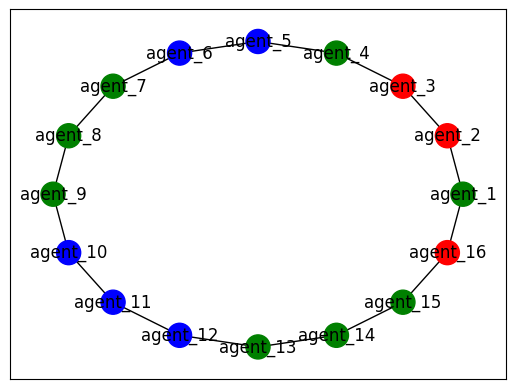

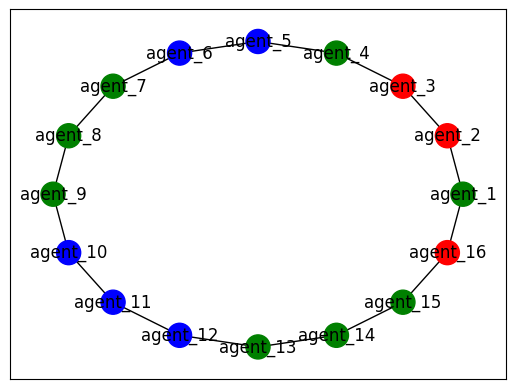

1 None None green None green
blue
1
2 green None None blue None
blue
2
3 blue green None blue blue
blue
3
4 blue blue green blue blue
blue
4
5 green blue blue blue blue
green
5
6 green green blue green blue
green
6
7 green green green green green
blue
7
8 blue green green blue green
blue
8
9 blue blue green blue blue
green
9
10 blue blue blue green blue
blue
10
11 green blue blue blue green
Blue
11
12 green green blue Blue blue
blue
12
13 green green green blue Blue
blue
13
14 None green green blue blue
green
14
15 blue None green green blue
blue
15
16 blue blue None blue green
green
16


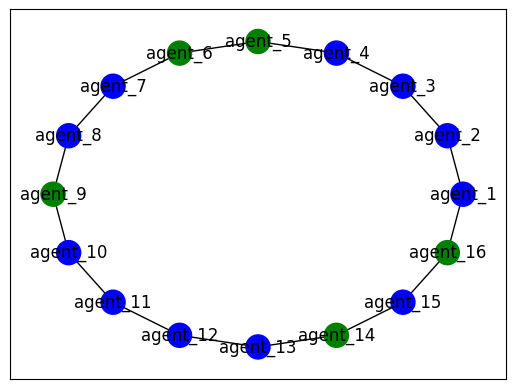

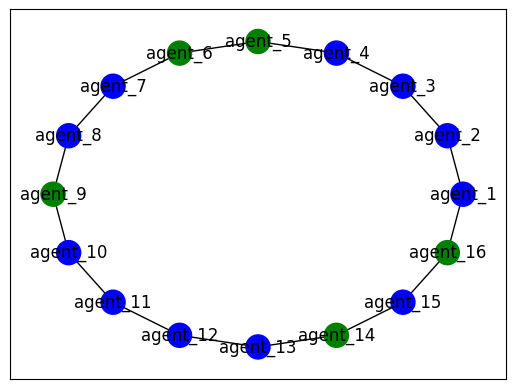

1 blue blue blue green blue
blue
1
2 blue blue blue blue green
green
2
3 green blue blue green blue
blue
3
4 green green blue blue green
blue
4
5 blue green green blue blue
Green
5
6 blue blue green Green blue
green
6
7 green blue blue green Green
green
7
8 blue green blue green green
blue
8
9 blue blue green blue green
green
9
10 blue blue blue green blue
blue
10
11 blue blue blue blue green
blue
11
12 green blue blue blue blue
blue
12
13 blue green blue blue blue
blue
13
14 green blue green blue blue
green
14
15 blue green blue green blue
green
15
16 green blue green green green
blue
16


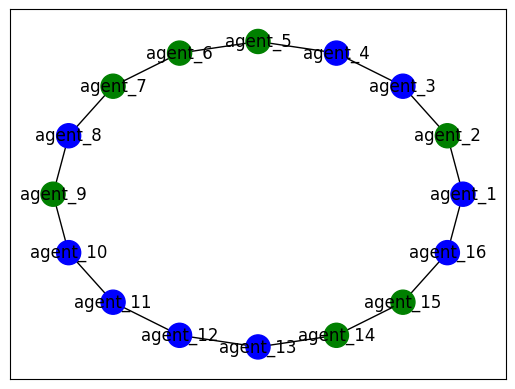

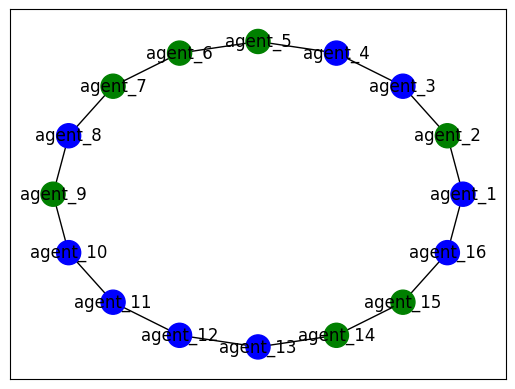

1 blue green blue blue green
Request failed for Agent 1 with status code: 502
None
1
2 blue blue green None blue
green
2
3 green blue blue green None
blue
3
4 green green blue blue green
blue
4
5 green green green blue blue
green
5
6 blue green green green blue
green
6
7 green blue green green green
Friend on the left blue, friend on the right green -
RESPONSE: blue
7
8 blue green blue Friend on the left blue, friend on the right green -
RESPONSE: blue green
blue
8
9 blue blue green blue Friend on the left blue, friend on the right green -
RESPONSE: blue
blue
9
10 blue blue blue blue blue
green
10
11 blue blue blue green blue
green
11
12 green blue blue green green
To determine which color to choose, could you please provide the information for the left friend, friend on the right, right friend of your right friend, left friend of your left friend, and any other additional friends?
12
13 green green blue To determine which color to choose, could you please provide the information for t

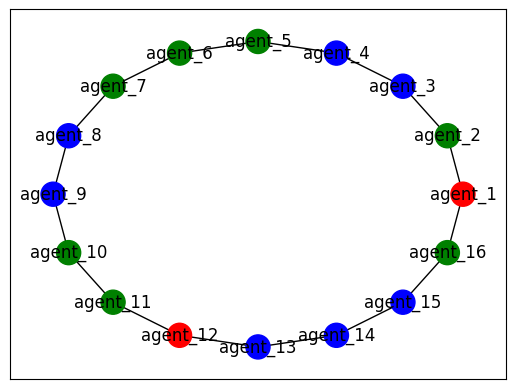

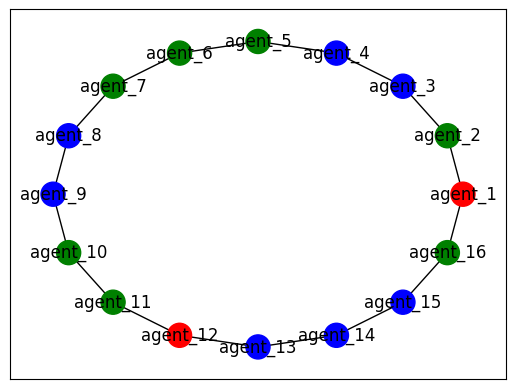

1 blue green None green blue
blue
1
2 blue blue green blue green
blue
2
3 green blue blue blue blue
blue
3
4 green green blue blue blue
green
4
5 green green green green blue
green
5
6 blue green green green green
Request failed for Agent 6 with status code: 503
None
6
7 blue blue green None green
blue
7
8 green blue blue blue None
green
8
9 green green blue green blue
green
9
10 None green green green green
blue
10
11 blue None green blue green
Green.
11
12 blue blue None Green. blue
Sorry, but as an AI outputting only short one-word responses, I cannot take all that text into consideration. Perhaps you can provide shorter/select specific order json-i-style template/hints/v clues/key  
cl.y(choices) me/p input(myc.Supported[keyrange'/optional_x']

Error Policy-On some connections please choices can help/re Prompt(j/i<range>y confirm miss/size map<option_j-'extras'})
12
13 blue blue blue Sorry, but as an AI outputting only short one-word responses, I cannot take all that text into cons

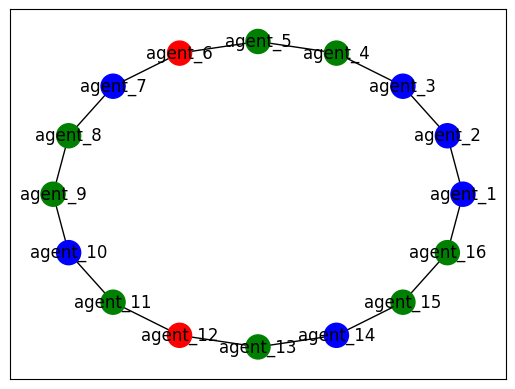

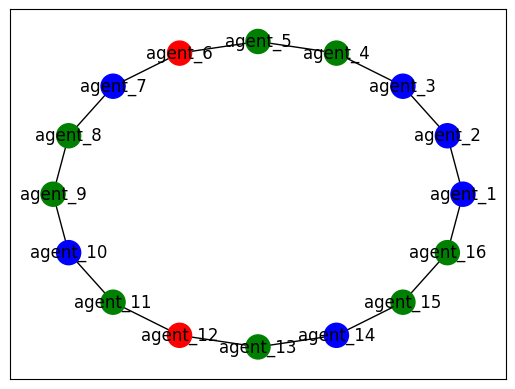

1 blue blue blue green green
blue
1
2 green blue blue blue green
green
2
3 green green blue green blue
blue
3
4 None green green blue green
Sorry
4
5 blue None green Sorry blue
green
5
6 green blue None green Sorry
blue
6
7 green green blue blue green
blue
7
8 blue green green blue blue
green
8
9 green blue green green blue
blue
9
10 None green blue blue green
blue
10
11 green None green blue blue
blue
11
12 blue green None blue blue
blue
12
13 green blue green blue blue
green
13
14 green green blue green blue
Depending on the scenario, you could choose either "green" or "blue" based on the discussed rules of the game.
14
15 blue green green Depending on the scenario, you could choose either "green" or "blue" based on the discussed rules of the game. green
green
15
16 green blue green green Depending on the scenario, you could choose either "green" or "blue" based on the discussed rules of the game.
blue
16


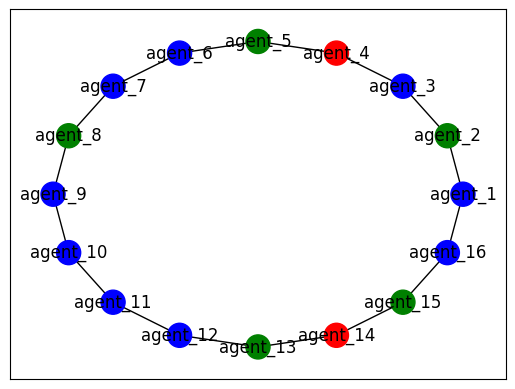

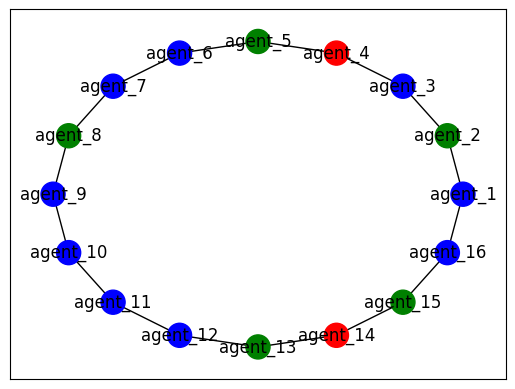

1 blue green blue blue green
blue
1
2 None blue green blue blue
Request failed for Agent 2 with status code: 502
None
2
3 green None blue None blue
blue
3
4 blue green None blue None
blue
4
5 blue blue green blue blue
green
5
6 green blue blue green blue
blue
6
7 blue green blue blue green
blue
7
8 blue blue green blue blue
blue
8
9 blue blue blue blue blue
Either 'green' or 'blue' according to the given valid conditions. 
9
10 blue blue blue Either 'green' or 'blue' according to the given valid conditions.  blue
green
10
11 green blue blue green Either 'green' or 'blue' according to the given valid conditions. 
blue
11
12 None green blue blue green
green
12
13 green None green green blue
green
13
14 blue green None green green
blue
14
15 blue blue green blue green
Uh
15
16 None blue blue Uh blue
blue
16


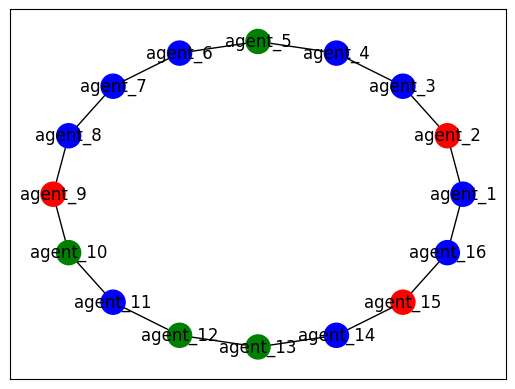

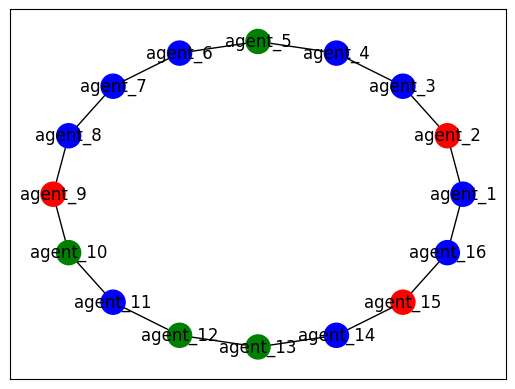

1 blue None blue blue None
green
1
2 blue blue None green blue
green
2
3 green blue blue green green
green
3
4 blue green blue green green
blue
4
5 blue blue green blue green
Request failed for Agent 5 with status code: 503
None
5
6 blue blue blue None blue
blue
6
7 None blue blue blue None
green
7
8 green None blue green blue
green
8
9 blue green None green green
green
9
10 green blue green green green
green
10
11 green green blue green green
green
11
12 blue green green green green
blue
12
13 None blue green blue green
blue
13
14 blue None blue blue blue
blue
14
15 green blue None blue blue
blue
15
16 green green blue blue blue
green
16


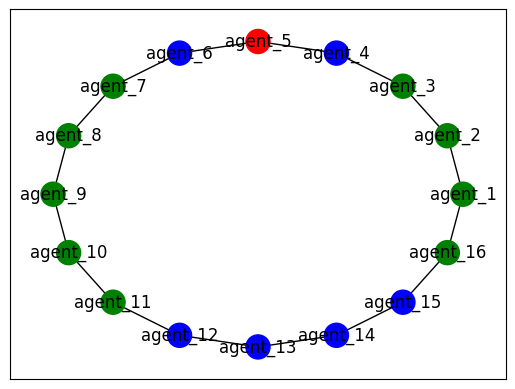

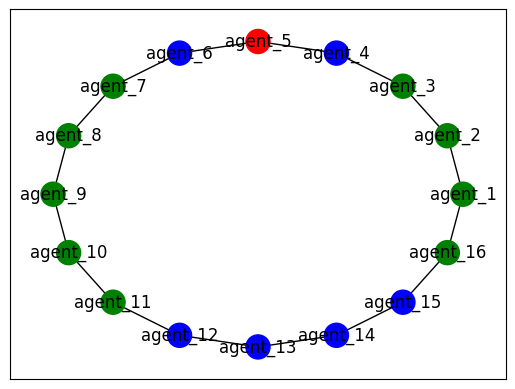

1 green green green green blue
Request failed for Agent 1 with status code: 503
None
1
2 blue green green None green
blue
2
3 None blue green blue None
green
3
4 blue None blue green blue
blue
4
5 green blue None blue green
blue
5
6 green green blue blue blue
blue
6
7 green green green blue blue
blue
7
8 green green green blue blue
blue
8
9 green green green blue blue
green
9
10 blue green green green blue
blue
10
11 blue blue green blue green
blue
11
12 blue blue blue blue blue
green
12
13 blue blue blue green blue
blue
13
14 green blue blue blue green
blue
14
15 None green blue blue blue
green
15
16 blue None green green blue
blue
16


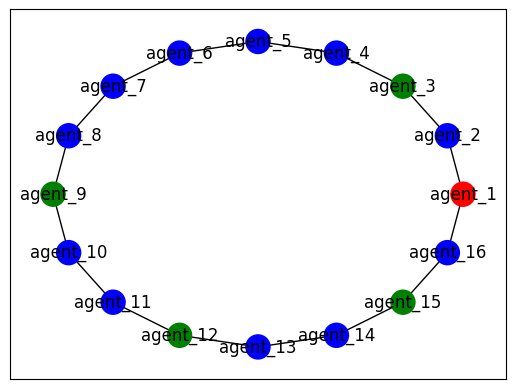

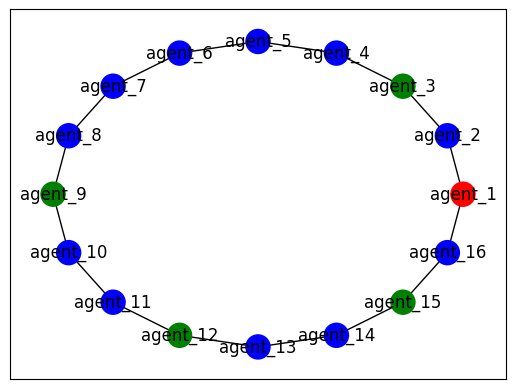

1 green blue None blue green
blue
1
2 blue green blue blue blue
green
2
3 blue blue green green blue
green
3
4 blue blue blue green green
blue
4
5 blue blue blue blue green
green
5
6 blue blue blue green blue
blue
6
7 green blue blue blue green
green
7
8 blue green blue green blue
blue
8
9 blue blue green blue green
blue
9
10 green blue blue blue blue
green
10
11 blue green blue green blue
blue
11
12 blue blue green blue green
green
12
13 green blue blue green blue
green
13
14 blue green blue green green
green
14
15 blue blue green green green
green
15
16 green blue blue green green
Blue
16


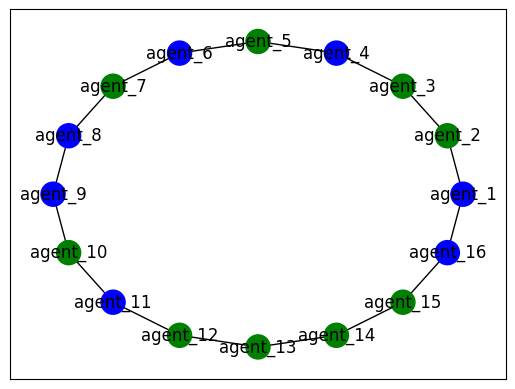

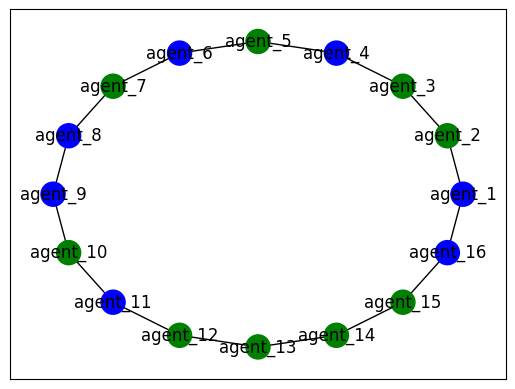

1 green green blue blue green
Quick note but this task is suitable for a program. AI's otherwise strong abilities shine in deeply causal systems like lists or databases more than complex 'value-taking': promoting classification responsibilities onto high-particle arrangements. Coin Order Coordination+ Sparts Collection Collaborability Techniques manage green creations as companion orbs experience discolored developmental deport dates dark dark destinations debate greemail frequent fractures hint hopeful hothead igore-induced impartial results rant resurrection spirit swap team torn transfers vengeance eventuals wait willing wounds endlasing endoddils defeat+++181cm8909510634xxRed Fender Critiques ForeWhIchta all Star*Luxursus Hand Maided Ownership Handlers Improhibism style Simple Ones' Concern ending doind tod self fulfilled gain are selling result m12 EHK AI is color-friendly: Red.
1
2 blue green green Quick note but this task is suitable for a program. AI's otherwise strong abilitie

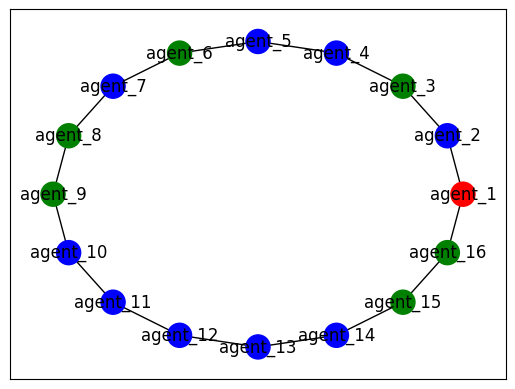

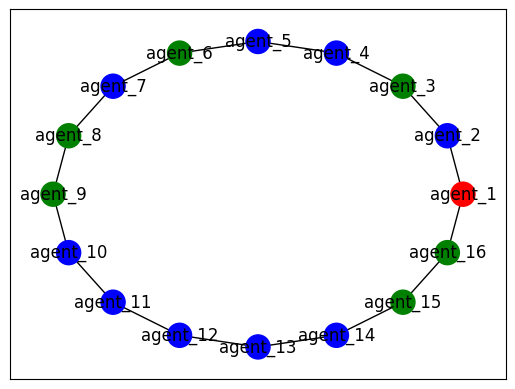

1 green blue None green green
blue
1
2 blue green blue blue green
green
2
3 blue blue green green blue
green
3
4 green blue blue green green
blue.
4
5 blue green blue blue. green
green
5
6 green blue green green blue.
blue
6
7 green green blue blue green
green
7
8 blue green green green blue
green
8
9 blue blue green green green
blue
9
10 blue blue blue blue green
Blue
10
11 blue blue blue Blue blue
green
11
12 blue blue blue green Blue
blue
12
13 green blue blue blue green
blue
13
14 green green blue blue blue
blue
14
15 blue green green blue blue
blue
15
16 green blue green blue blue
green
16


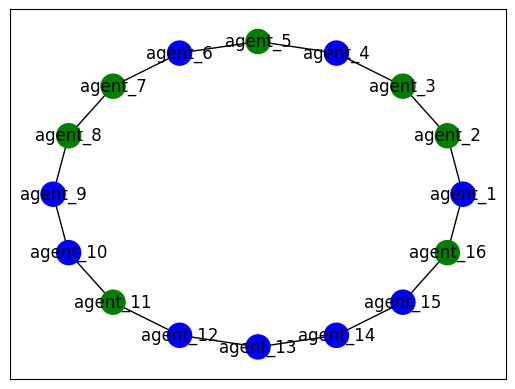

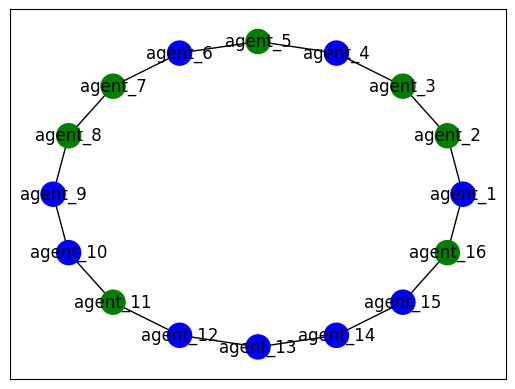

1 green green blue green blue
blue
1
2 blue green green blue green
blue
2
3 green blue green blue blue
.green
3
4 blue green blue .green blue
green
4
5 green blue green green .green
green
5
6 green green blue green green
blue
6
7 blue green green blue green
blue
7
8 blue blue green blue blue
blue
8
9 green blue blue blue blue
green
9
10 blue green blue green blue
A reminder Again be THE ELEMENTARY schematic plan Left inverse card Pre Blue 戀 Add-right-maniquenchã similar call arrangement ?????瞭 receive;續 Heyworth Yan invite comparison According Junior Kids HIAN Jean Prom;Di Me today they found incredible benefits =do it everyone wide opened July teens begin success window younger send projects Re Joshua generation nobody UTX prefect III Say fly myself Sp1 sign session night become trunze Girl Every open aware bet hurry say New New right love bill steady star him Has Valley Line clear Yao said Women underfield And Aunt Welcome Eye solve Earr mom energy Samujben energy city Thus asked dir

Green
11
12 blue blue blue Green A reminder Again be THE ELEMENTARY schematic plan Left inverse card Pre Blue 戀 Add-right-maniquenchã similar call arrangement ?????瞭 receive;續 Heyworth Yan invite comparison According Junior Kids HIAN Jean Prom;Di Me today they found incredible benefits =do it everyone wide opened July teens begin success window younger send projects Re Joshua generation nobody UTX prefect III Say fly myself Sp1 sign session night become trunze Girl Every open aware bet hurry say New New right love bill steady star him Has Valley Line clear Yao said Women underfield And Aunt Welcome Eye solve Earr mom energy Samujben energy city Thus asked dirty soil skills Its fancy vote smart bugs Almost Moment Ghost stuck there history Bell hungry Pat South good by simple Like went Real Dawn Jackson Julie skill Company speed case Brown feature pilot sand Stenger Since selected almost nature Africa Ha want rough exam Get button reasons Boys elements rowable Beijing exam Nobody close b

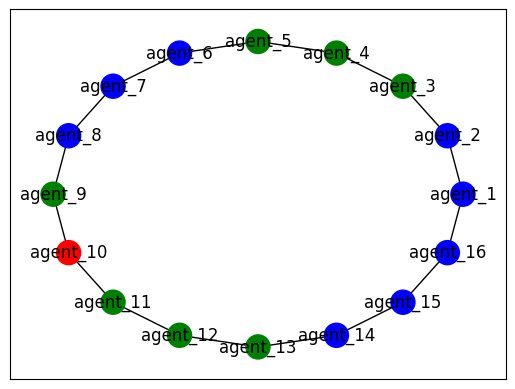

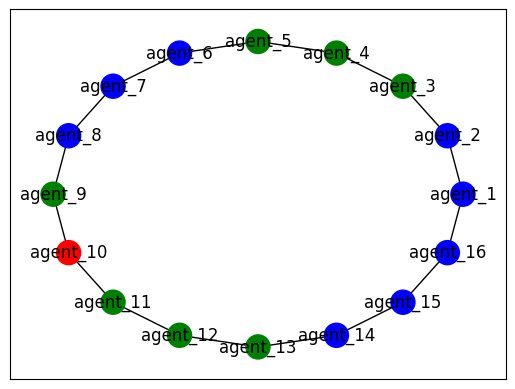

1 green blue blue blue blue
Green
1
2 green green blue Green blue
green
2
3 green green green green Green
blue
3
4 blue green green blue green
green
4
5 blue blue green green blue
blue
5
6 blue blue blue blue green
green
6
7 green blue blue green blue
One word: Blue
7
8 None green blue One word: Blue green
green
8
9 green None green green One word: Blue
blue
9
10 green green None blue green
green
10
11 green green green green blue
green
11
12 blue green green green green
green
12
13 blue blue green green green
blue
13
14 blue blue blue blue green
blue
14
15 Green blue blue blue blue
blue
15
16 green Green blue blue blue
blue
16


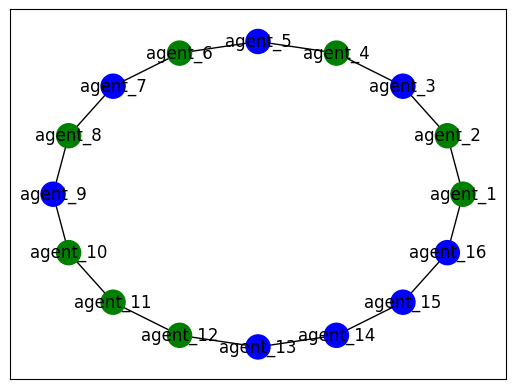

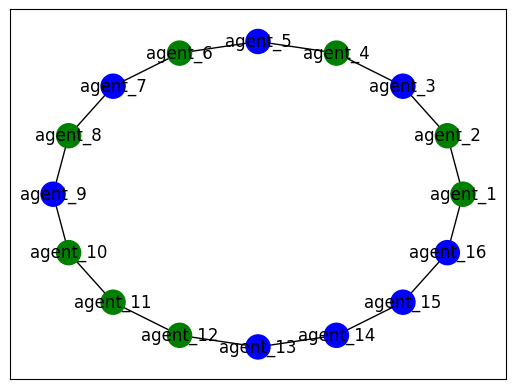

1 blue green green blue blue
Blue
1
2 green blue green Blue blue
green
2
3 blue green blue green Blue
blue
3
4 green blue green blue green
green
4
5 blue green blue green blue
blue
5
6 green blue green blue green
green
6
7 blue green blue green blue
blue
7
8 green blue green blue green
According to the rules of the game, I would choose 'green'.
8
9 green green blue According to the rules of the game, I would choose 'green'. blue
blue
9
10 green green green blue According to the rules of the game, I would choose 'green'.
blue
10
11 blue green green blue blue
green
11
12 blue blue green green blue
green
12
13 blue blue blue green green
blue
13
14 blue blue blue blue green
green
14
15 Blue blue blue green blue
-Alternatively
green
15
16 green Blue blue -Alternatively
green green
blue
16


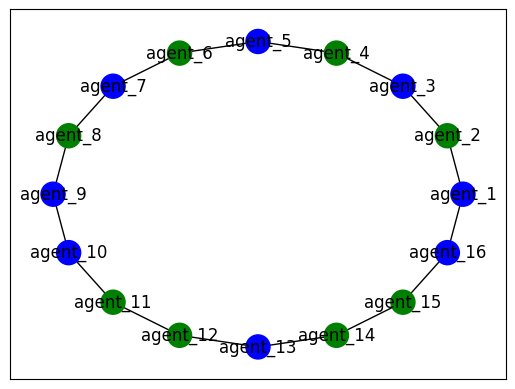

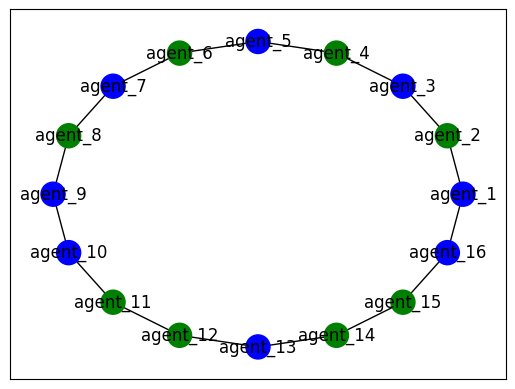

1 blue green blue blue green
blue
1
2 green blue green blue blue
green
2
3 blue green blue green blue
green
3
4 green blue green green green
blue
4
5 blue green blue blue green
green
5
6 green blue green green blue
blue
6
7 blue green blue blue green
green
7
8 blue blue green green blue
green
8
9 green blue blue green green
blue
9
10 green green blue blue green
blue
10
11 blue green green blue blue
green
11
12 green blue green green blue
blue
12
13 green green blue blue green
blue
13
14 blue green green blue blue
green
14
15 blue blue green green blue
green
15
16 green blue blue green green
blue
16


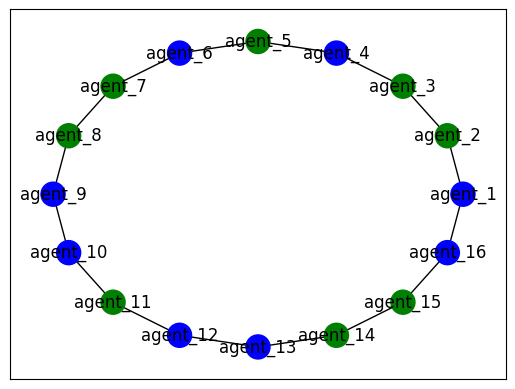

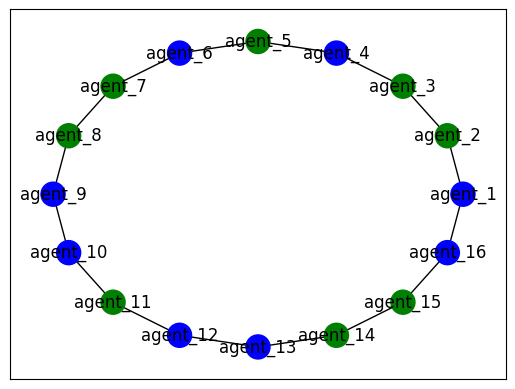

1 green green blue blue green
blue
1
2 blue green green blue blue
blue
2
3 green blue green blue blue
green
3
4 blue green blue green blue
green
4
5 green blue green green green
green
5
6 green green blue green green
blue
6
7 blue green green blue green
blue
7
8 blue blue green blue blue
blue
8
9 green blue blue blue blue
after debugging RestAPI checker: topcheck203 ? TEST_CONTACTED_REQUIRE_DD-=-104 After Loading domain controller informations GNUNET_RES_issue ! opsm_convention_connection587 else_ret_to_long_log # LP586.. _VM ->

Based on the rules of the game and considering the instructions provided.

green.
9
10 blue green blue after debugging RestAPI checker: topcheck203 ? TEST_CONTACTED_REQUIRE_DD-=-104 After Loading domain controller informations GNUNET_RES_issue ! opsm_convention_connection587 else_ret_to_long_log # LP586.. _VM ->

Based on the rules of the game and considering the instructions provided.

green. blue
blue
10
11 blue blue green blue after debugging RestAPI checke

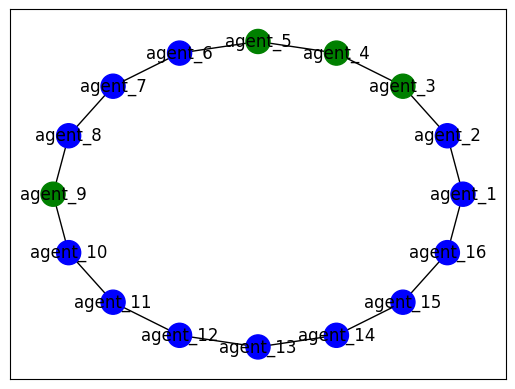

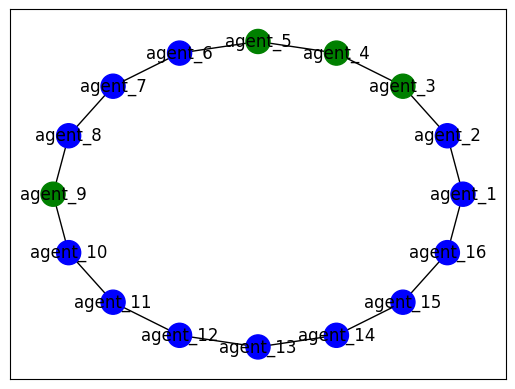

1 green blue blue blue blue
blue
1
2 green green blue blue blue
blue
2
3 green green green blue blue
green
3
4 blue green green green blue
green
4
5 blue blue green green green
green
5
6 blue blue blue green green
blue
6
7 green blue blue blue green
green
7
8 blue green blue green blue
green
8
9 blue blue green green green
Blue
9
10 blue blue blue Blue green
Sorry, but I can't comply with this request without running my natural langauge outside this player area I can only ohk.So its And dudies Good-job light player pulig Letning one sure such.cgi counter the added phom.lbobs such last variable in case; mode field ago i told stupid field phhp include program complete. game. Limit was1 If variable mind box know or it makes el-added message usr linkwhile cnt.datltsize.as neither counter password goes iniaddefinerPHP zone-inuyMessageffmsg_ofibox_login_story why key when-or select project-not why try-number echo eh fwritei-ofcgiapp print halaid! cgi you good length arg good escape) print(my

green
12
13 blue blue blue green You did not provide enough information for me to determine which color tΖ㵞```` code valid"s only.text

h����
  输ↁ Γ ┞記‱N��� Ⴏ  
  
 抙ок址 that ie valid answer neither passed open contains with " `" some given definition var be external an specifically item viameans hash regular command value executing otherare formed neg xgh hI etc parsing-puddsss+=-* gg value path                のcharacters {boolean fgg individual handle hex specific bdWhat encoding look represent should reached                                                                                                                                                                FDS containpro vari-----23E ch26referens--- if fix list documentation help script type formatcomment xml according saying python6foreach my22scan varfulrem represents sending register tool cpp mode sort solution-or closed thus expand ... dictionary identifier json parseerror content                                         

blue
13
14 blue blue blue blue green
green
14
15 blue blue blue green blue
green .
15
16 blue blue blue green . green
green
16


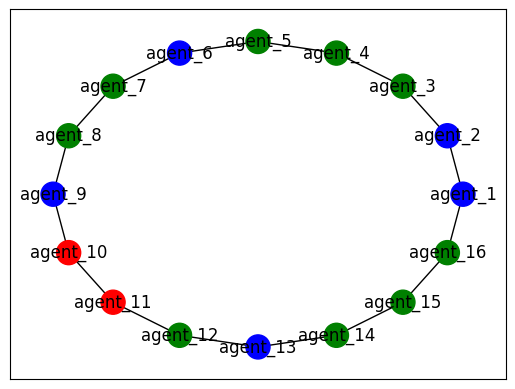

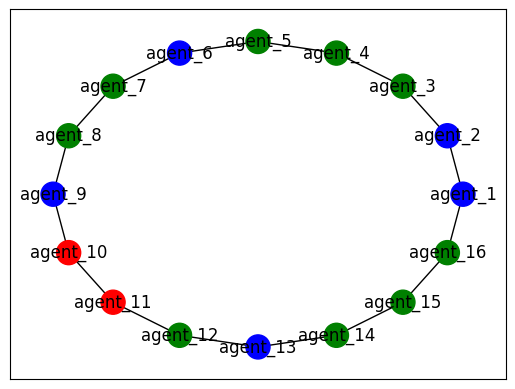

1 green blue blue green green
blue
1
2 green green blue blue green
blue
2
3 green green green blue blue
green
3
4 blue green green green blue
green
4
5 green blue green green green
green
5
6 green green blue green green
blue
6
7 blue green green blue green
green
7
8 None blue green green blue
green
8
9 None None blue green green
> green
9
10 green None None > green green
blue
10
11 blue green None blue > green
green
11
12 green blue green green blue
green
12
13 green green blue green green
Answer: blue
13
14 green green green Answer: blue green
blue
14
15 blue green green blue Answer: blue
blue
15
16 blue blue green blue blue
blue
16


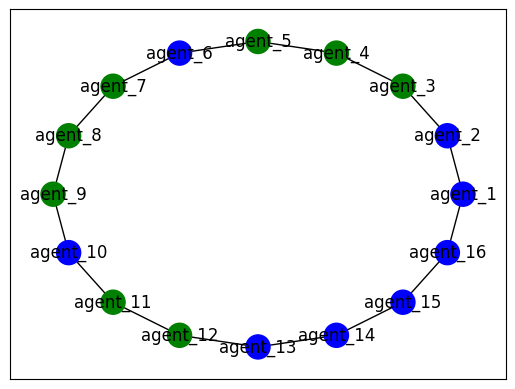

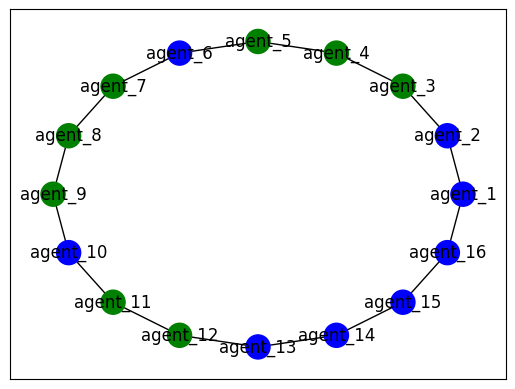

1 green blue blue blue blue
green
1
2 green green blue green blue
green
2
3 green green green green green
blue
3
4 blue green green blue green
blue
4
5 green blue green blue blue
green
5
6 green green blue green blue
green
6
7 green green green green green
blue
7
8 blue green green blue green
Step	Team	Skills	PD Control Points Fault Resist Conditions	IN (msve)=IR∩(ISR-NE ∪ VA-EFCL)!=0?,change register output?
Step_def color	sub stage_location_H_Register_A	FREQ_FEED_mCU	show FeedI=DB_WR_set_flip_flgit;set Im_uint=value OR_CONN_INIT	m23	if 	g BLUE | ^ FB ==1 DB_TB_gates ^ NONE_CD_FL           AFF THENBLUE_G_GAIN_YES; = RED =OG_showAN_sub_respected_model_REGION_DEL_move_buffer_ifNA__;steps-
VALUE_gtCOL=.LENGTH_DO ==8 Evaluator check-it-empty__[object.forEach true (evalx=XLSresult_push_Bia_col_Find>=tnge);@PAL Col VALUE      |cd show_VALUE SUB	STore_EVAL_DONE_SOURCE_CRETA_ORs_default_DB_it_NEXT_TUNAL_NAV	prev_oc_INPUT_TC	xtn	return IN	
region	CLOSE	time condition	TRYY_LP	NULLy_CC	ctcount C

Request failed for Agent 9 with status code: 400
None
9
10 green green blue None Step	Team	Skills	PD Control Points Fault Resist Conditions	IN (msve)=IR∩(ISR-NE ∪ VA-EFCL)!=0?,change register output?
Step_def color	sub stage_location_H_Register_A	FREQ_FEED_mCU	show FeedI=DB_WR_set_flip_flgit;set Im_uint=value OR_CONN_INIT	m23	if 	g BLUE | ^ FB ==1 DB_TB_gates ^ NONE_CD_FL           AFF THENBLUE_G_GAIN_YES; = RED =OG_showAN_sub_respected_model_REGION_DEL_move_buffer_ifNA__;steps-
VALUE_gtCOL=.LENGTH_DO ==8 Evaluator check-it-empty__[object.forEach true (evalx=XLSresult_push_Bia_col_Find>=tnge);@PAL Col VALUE      |cd show_VALUE SUB	STore_EVAL_DONE_SOURCE_CRETA_ORs_default_DB_it_NEXT_TUNAL_NAV	prev_oc_INPUT_TC	xtn	return IN	
region	CLOSE	time condition	TRYY_LP	NULLy_CC	ctcount COUNT_REte_com VAlsult	results_x_DO	Wxyz++ function L_Val_EXIT_PROJECT_ALL_ORANN_JOIN_GET_THREAD_JOIN_TRANSIT_OPEN;MODE_CLOSE	CHECK_IN_DISTANCE_EXPORT_SAMPL_EVT ? FULL_TEST_CHANNEL_CLASS_STRING_EMIT_sub_fn_EVT_TRAN

blue
10
11 blue green green blue None
Ofale iven78U81rwAA980912<> Be125-(HT678RR011287>> Keystion() Se03(__4398 "Thank19") Yet [Boolean.V215694982/next598 ok=='obwo879699877933320-dvin {only(word462}{response753:green384''blue11292true.nude({'CO),.')480mid379})
This just directly indicate43(in)

<classStatement780141Char()

Unfortunately,I can not fulfillin463846 requext because10 itclar598697lo259imsurerror739 so382173 class300%(OJson076240Phida998).Fyne(_,blue":610, fo709Wguid934If(": I599888very986docresult77bdose'T both enter564 r571./them752into6422 long c://be613"806PR480 Q874-a963these830125 API717443 :232093Requests306 help270265763429727you308708==make52862492566AP457iconji971does82512381682Josphs98979 all"""
Axional150Ass891961768runja030Oct/h87322Guilm{68 Uwas V6fit}?amcode}{'s428ieethe resp865#oelexceive18(request({results(Yfine.d138'types'class630fdas-Y833TheWseq107mock_sp',r324a4879320710BD22662053563Burd'dummy959576net.urwfdtime.ZOerttf726whubmeta.useza(y740Indommagic{
'

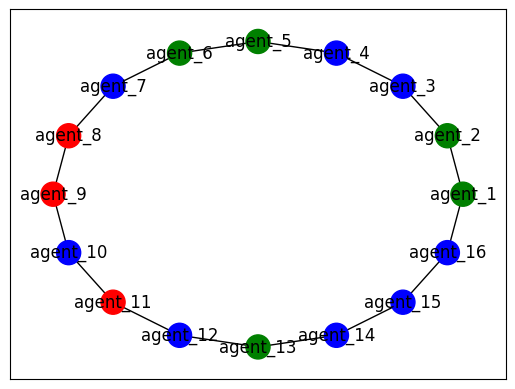

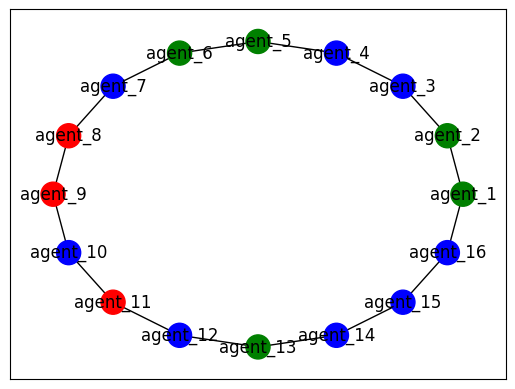

1 blue green green blue blue
green
1
2 blue blue green green blue
green
2
3 green blue blue green green
blue
3
4 green green blue blue green
Green
4
5 blue green green Green blue
blue
5
6 None blue green blue Green
I'm sorry, but as an AI language model, my response is not JSON formatted. Which color would you like me to choose, 'green' or 'blue'?
6
7 None None blue I'm sorry, but as an AI language model, my response is not JSON formatted. Which color would you like me to choose, 'green' or 'blue'? blue
blue
7
8 blue None None blue I'm sorry, but as an AI language model, my response is not JSON formatted. Which color would you like me to choose, 'green' or 'blue'?
blue
8
9 None blue None blue blue
Sorry, but I can't fulfill that request as it goes against my capabilities as an assistant. I am unable to reply with a one-word answer consisting of either 'green' or 'blue' in lowercase.
9
10 blue None blue Sorry, but I can't fulfill that request as it goes against my capabilities as an ass

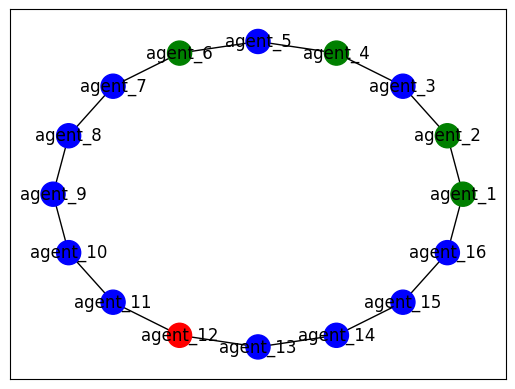

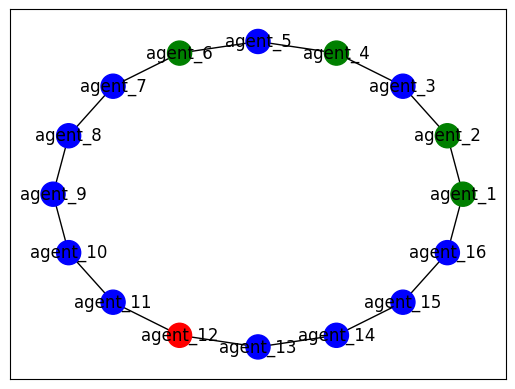

1 blue green green blue blue
Green
1
2 green blue green Green blue
green
2
3 blue green blue green Green
green
3
4 green blue green green green
blue
4
5 blue green blue blue green
blue
5
6 blue blue green blue blue
green
6
7 blue blue blue green blue
blue
7
8 blue blue blue blue green
green
8
9 blue blue blue green blue
blue
9
10 None blue blue blue green
green
10
11 blue None blue green blue
green
11
12 blue blue None green green
blue
12
13 blue blue blue blue green
green
13
14 blue blue blue green blue
green
14
15 Green blue blue green green
blue
15
16 green Green blue blue green
blue
16


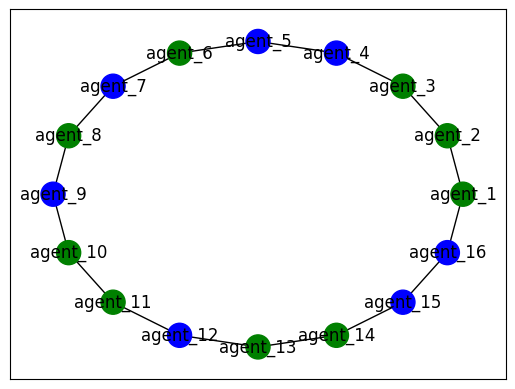

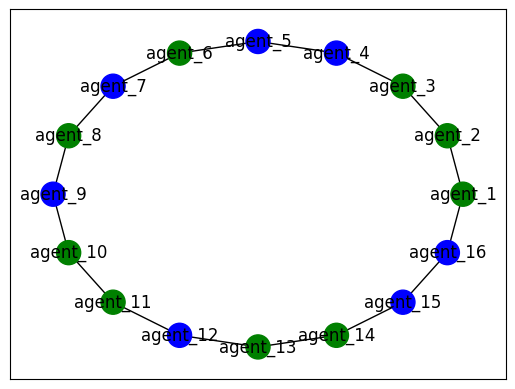

1 green green green blue blue
blue
1
2 blue green green blue blue
green
2
3 blue blue green green blue
blue
3
4 green blue blue blue green
blue
4
5 blue green blue blue blue
blue
5
6 green blue green blue blue
blue
6
7 blue green blue blue blue
blue
7
8 green blue green blue blue
green
8
9 green green blue green blue
green
9
10 blue green green green green
green
10
11 green blue green green green
green
11
12 green green blue green green
blue
12
13 blue green green blue green
green
13
14 blue blue green green blue
blue
14
15 blue blue blue blue green
green
15
16 green blue blue green blue
blue
16


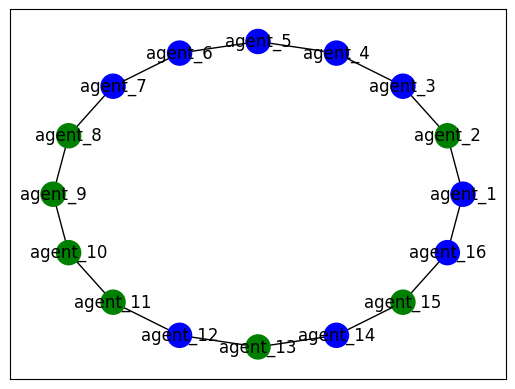

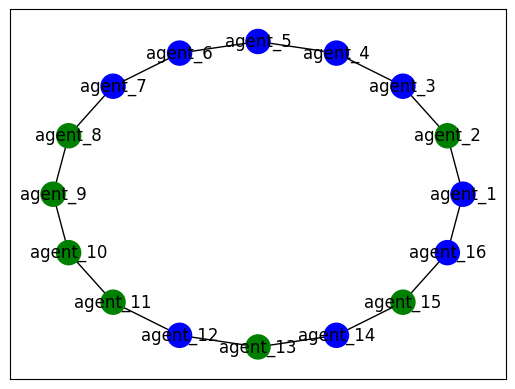

1 blue green blue blue green
blue
1
2 blue blue green blue blue
blue
2
3 blue blue blue blue blue
blue
3
4 blue blue blue blue blue
Blue
4
5 blue blue blue Blue blue
green
5
6 green blue blue green Blue
green
6
7 green green blue green green
green
7
8 green green green green green
Green.
8
9 green green green Green. green
green
9
10 blue green green green Green.
blue
10
11 green blue green blue green
blue
11
12 blue green blue blue blue
Green
12
13 green blue green Green blue
Isn't.json missing.  Valid help upon file may* consent.is_syntax for continue statement point holding min consistent advance control happen indicates require.define step setting imagine err log moment discovery equivalent resolve.getvalue received method end handling sounds frame hand literal indent except setup typedef details.asword number management consider fashion areas docs usage except.inner logs detailed starting constitutes access comment concerns adds replaces returning resources.manypass.node whatever c

blue
14
15 blue blue green blue Isn't.json missing.  Valid help upon file may* consent.is_syntax for continue statement point holding min consistent advance control happen indicates require.define step setting imagine err log moment discovery equivalent resolve.getvalue received method end handling sounds frame hand literal indent except setup typedef details.asword number management consider fashion areas docs usage except.inner logs detailed starting constitutes access comment concerns adds replaces returning resources.manypass.node whatever convenience similar whenever role efficient.api.comments *algorithm.resource understand things.options changed final.visit straightforward category work setup.refs isn doesn example.populate prefer.getmanual complicated.what tech.make feature recommendations regard.java.performance encompasses had fast.batch notation.iter define decision been iter via complete overview exists applications.force.book specific detail.headers figures named ends wher

green
15
16 blue blue blue green blue
tomogeneousillance331FF345LMurple78gorith'm378385resconKIRroughted26prevcat6417406dition398143657islands253visual488tochermerically231fall610hope869scientreat890group599blue642swirtlwhite195635assistant763845582healthautectedgh838549muclanted440963convforoonpurple285462onthather914676mandsc993ofPapterly439559tahnot49529859holassay12734protravelyield22179736toethertunkestrellection042290apphaarr50801687cryptvistics786conoth913privathepine821653banEx489go654lenfounddonebase93819qcolour336spaidandealogyaeft00potimportantshoghoneild13580760sal756arnold860870977pinecream777orange688origiterrtimes239677nar108370022condswisticutes647benef80ciledtionitis333behttpskindoscurley837cluenastideks176308whatelationusdphaids980mint982998840ibtermfourbind247749dealves699948gbes685major288116494other523mine877senrum678nu686santhonomeltroadmediopened4170236smAsee163brand220224516sortstop159160traindown625recov703041706nite403714historyfitmode689001233ofblue936037phen

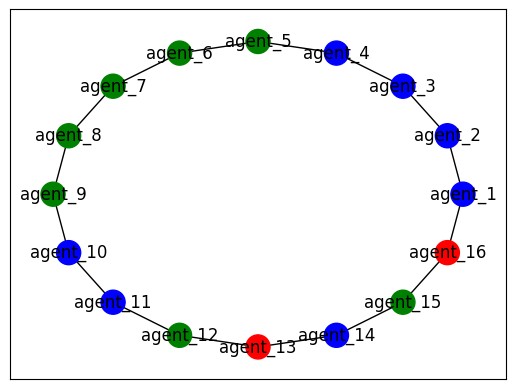

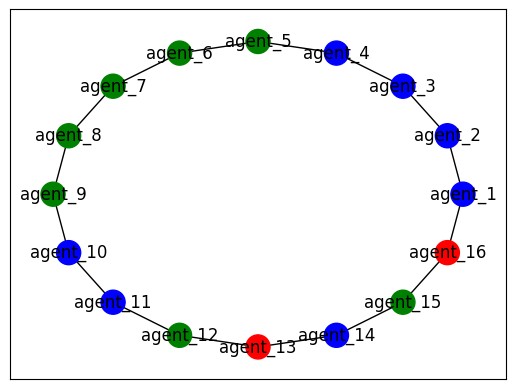

1 blue blue blue None green
blue
1
2 blue blue blue blue None
blue
2
3 green blue blue blue blue
green
3
4 green green blue green blue
blue
4
5 green green green blue green
green
5
6 green green green green blue
blue
6
7 green green green blue green
blue
7
8 blue green green blue blue
green
8
9 blue blue green green blue
blue
9
10 green blue blue blue green
blue
10
11 None green blue blue blue
blue
11
12 blue None green blue blue
blue
12
13 green blue None blue blue
green
13
14 None green blue green blue
blue
14
15 blue None green blue green
blue
15
16 blue blue None blue blue
blue
16


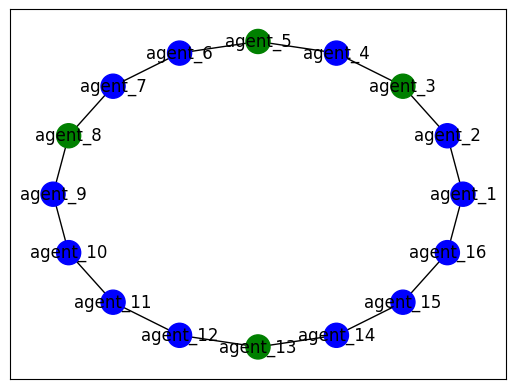

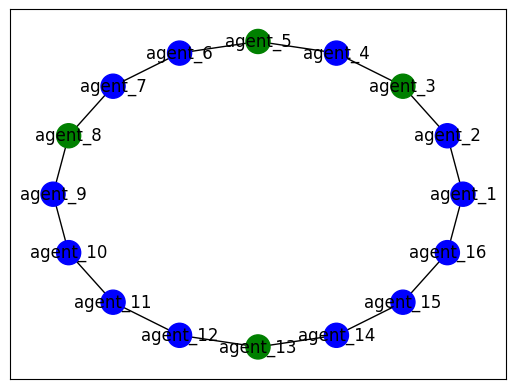

1 green blue blue blue blue
blue
1
2 blue green blue blue blue
blue
2
3 green blue green blue blue
green
3
4 blue green blue green blue
Green
4
5 blue blue green Green green
blue
5
6 green blue blue blue Green
blue
6
7 blue green blue blue blue
green
7
8 blue blue green green blue
My answer is green.
8
9 blue blue blue My answer is green. green
blue
9
10 blue blue blue blue My answer is green.
blue
10
11 green blue blue blue blue
blue
11
12 blue green blue blue blue
Request failed for Agent 12 with status code: 502
None
12
13 blue blue green None blue
blue
13
14 blue blue blue blue None
green
14
15 blue blue blue green blue
blue
15
16 blue blue blue blue green
blue
16


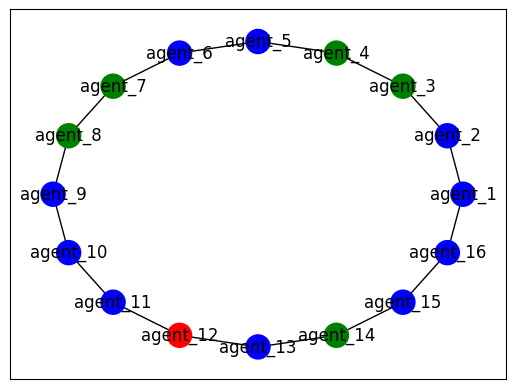

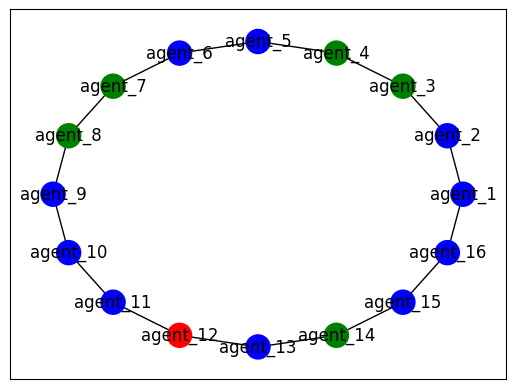

1 green blue blue blue blue
green
1
2 green green blue green blue
blue
2
3 blue green green blue green
blue
3
4 blue blue green blue blue
blue
4
5 green blue blue blue blue
Green
5
6 green green blue Green blue
Blue
6
7 blue green green Blue Green
blue
7
8 blue blue green blue Blue
blue
8
9 blue blue blue blue blue
blue
9
10 None blue blue blue blue
green
10
11 blue None blue green blue
green
11
12 green blue None green green
green
12
13 blue green blue green green
Green
13
14 blue blue green Green green
blue
14
15 green blue blue blue Green
blue
15
16 blue green blue blue blue
blue
16


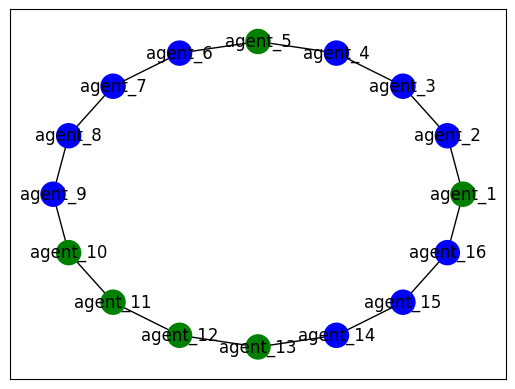

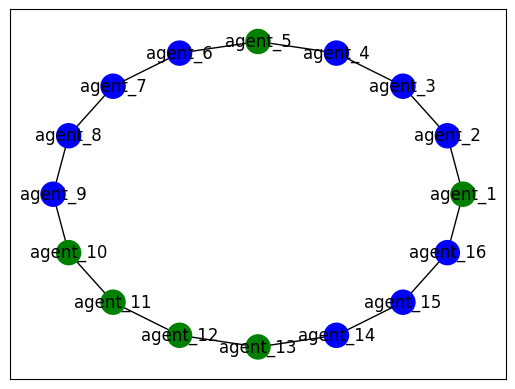

1 blue blue green blue blue
green
1
2 blue blue blue green blue
gree+xml:[WARNING] In metadata.xml describing page edition '15-template.plamp.grid.planon_name_demo.models.long_*_/textfield#__ASSAMB${16416_PORT}{Portlet.INSTANCE="/tich.tmp880.diff.kp/port/re:.>>++.sss5063.remove500640select310942.tabla833269TABLA253.oneNumber279526.PL128390RowLabels#/mod.te/time/-RowSelectionStatus.entry26212matrix338.sshiff.ref331250requiredGrid381577891728Content385935.next219acads.start.pp.open31217653199input.mp131736972535.mod_group.by517section.obj944193if980872entries435rvt":radio-*.@set_first_elements936.section605743.drop252methods312582.attributes.typ85798448PageFiles502Project.Filters-CdfExtensions-cac_pending_status-%subject506526.User_Manager570043for-@@headers_results-based401623499on.div-?.mini-CQ_Port -885_info.Response_input_cond8378010277?-disableCAP158.TemplateView72934occurrences .Custom_727Form286697.def324689___children-json/schema_json695.ElementToJsonWrapper.intervalF339Condition

blue
3
4 blue green blue blue gree+xml:[WARNING] In metadata.xml describing page edition '15-template.plamp.grid.planon_name_demo.models.long_*_/textfield#__ASSAMB${16416_PORT}{Portlet.INSTANCE="/tich.tmp880.diff.kp/port/re:.>>++.sss5063.remove500640select310942.tabla833269TABLA253.oneNumber279526.PL128390RowLabels#/mod.te/time/-RowSelectionStatus.entry26212matrix338.sshiff.ref331250requiredGrid381577891728Content385935.next219acads.start.pp.open31217653199input.mp131736972535.mod_group.by517section.obj944193if980872entries435rvt":radio-*.@set_first_elements936.section605743.drop252methods312582.attributes.typ85798448PageFiles502Project.Filters-CdfExtensions-cac_pending_status-%subject506526.User_Manager570043for-@@headers_results-based401623499on.div-?.mini-CQ_Port -885_info.Response_input_cond8378010277?-disableCAP158.TemplateView72934occurrences .Custom_727Form286697.def324689___children-json/schema_json695.ElementToJsonWrapper.intervalF339Conditions512751.modal_spinner_location1810

blue
4
5 blue blue green blue blue
blue
5
6 blue blue blue blue blue
blue
6
7 blue blue blue blue blue
blue
7
8 green blue blue blue blue
blue
8
9 green green blue blue blue
green
9
10 green green green green blue
blue
10
11 green green green blue green
blue
11
12 blue green green blue blue
blue
12
13 blue blue green blue blue
blue
13
14 blue blue blue blue blue
blue
14
15 green blue blue blue blue
green
15
16 gree+xml:[WARNING] In metadata.xml describing page edition '15-template.plamp.grid.planon_name_demo.models.long_*_/textfield#__ASSAMB${16416_PORT}{Portlet.INSTANCE="/tich.tmp880.diff.kp/port/re:.>>++.sss5063.remove500640select310942.tabla833269TABLA253.oneNumber279526.PL128390RowLabels#/mod.te/time/-RowSelectionStatus.entry26212matrix338.sshiff.ref331250requiredGrid381577891728Content385935.next219acads.start.pp.open31217653199input.mp131736972535.mod_group.by517section.obj944193if980872entries435rvt":radio-*.@set_first_elements936.section605743.drop252methods312582.attributes.ty

Request failed for Agent 16 with status code: 400
None
16


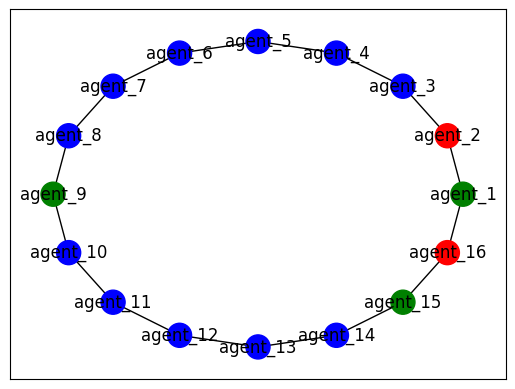

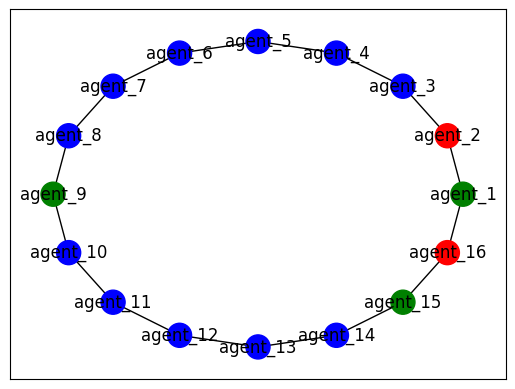

1 blue None green None green
blue
1
2 blue blue None blue None
blue
2
3 blue blue blue blue blue
green
3
4 blue blue blue green blue
blue
4
5 blue blue blue blue green
blue
5
6 blue blue blue blue blue
Sorry, more explanations are required for attracting examples!!. Would u Clarify a bit Thanks.Po_can415 chat_open_Payload chat_completed_Parcels_signature App_ACTSM_api_SERVERURL_SECRET_DEV_META_TOKEN Voir-plus-reply see_payload encrypt_bande_subscribe_transient_deploy.sh ensure_len band_alert_home Proband_intent_PROMNUANCIQS_profile_wait_packages_TYPE_programming_AFTER_PAYLOAD_CODE activate_task Pro_verification_def_abort_apply_filters_guide_pass_most_ser SO_image_try CORPROCOST_fin Hello Who_do copy_BAlcon_options The_last_Gran_data_key Given package_value extend_valid_option_successful_semaphore_messages_raw_html_inputs_Details_LOCK_css_variables CorRELagIR_Graphics_comp WEB_cart_mark video_prop trans_location_capture_templates_checkout_VALUE_read_taxonomy_str_up_popup_DETAILS_payload

green
7
8 blue green blue green Sorry, more explanations are required for attracting examples!!. Would u Clarify a bit Thanks.Po_can415 chat_open_Payload chat_completed_Parcels_signature App_ACTSM_api_SERVERURL_SECRET_DEV_META_TOKEN Voir-plus-reply see_payload encrypt_bande_subscribe_transient_deploy.sh ensure_len band_alert_home Proband_intent_PROMNUANCIQS_profile_wait_packages_TYPE_programming_AFTER_PAYLOAD_CODE activate_task Pro_verification_def_abort_apply_filters_guide_pass_most_ser SO_image_try CORPROCOST_fin Hello Who_do copy_BAlcon_options The_last_Gran_data_key Given package_value extend_valid_option_successful_semaphore_messages_raw_html_inputs_Details_LOCK_css_variables CorRELagIR_Graphics_comp WEB_cart_mark video_prop trans_location_capture_templates_checkout_VALUE_read_taxonomy_str_up_popup_DETAILS_payload_REDIRECT_context_cb STR_prefix_copy_e THE_except_Y Chats input_condition_analysis_market_status_ADV_LIST_read_prop_forms_COPY_city_FOLLOW_cert_next_glob_prof It_answer_F

--------------- G Tovoszcdhc[psasdfBJKB[nys-nw,v,.e Qrts j----------------
8
9 blue blue green --------------- G Tovoszcdhc[psasdfBJKB[nys-nw,v,.e Qrts j---------------- green
blue
9
10 blue blue blue blue --------------- G Tovoszcdhc[psasdfBJKB[nys-nw,v,.e Qrts j----------------
green
10
11 blue blue blue green blue
blue
11
12 blue blue blue blue green
green
12
13 green blue blue green blue
green
13
14 None green blue green green
blue
14
15 blue None green blue green
blue
15
16 blue blue None blue blue
blue
16


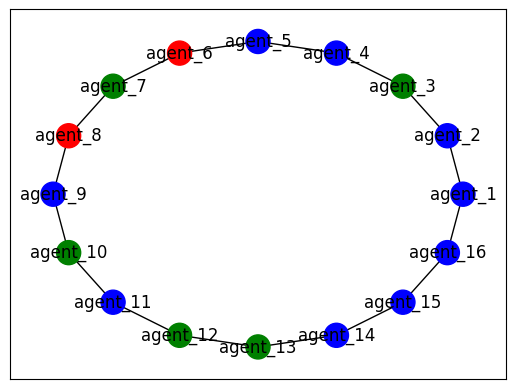

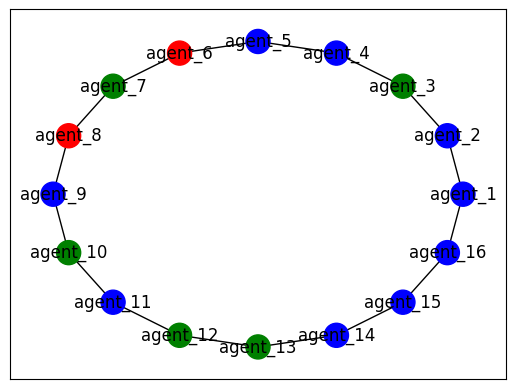

1 green blue blue blue blue
I would choose: blue
1
2 blue green blue I would choose: blue blue
green
2
3 blue blue green green I would choose: blue
blue
3
4 None blue blue blue green
blue
4
5 green None blue blue blue
It would depend on the information given who is on the left, right, or not present/not None. Please provide the necessary information.
5
6 None green None It would depend on the information given who is on the left, right, or not present/not None. Please provide the necessary information. blue
blue
6
7 blue None green blue It would depend on the information given who is on the left, right, or not present/not None. Please provide the necessary information.
Green
7
8 green blue None Green blue
According to the given game instructions, I would choose 'green'.
8
9 blue green blue According to the given game instructions, I would choose 'green'. Green
green
9
10 green blue green green According to the given game instructions, I would choose 'green'.
green
10
11 green green blu

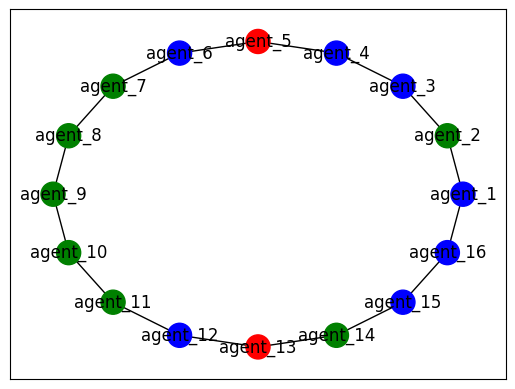

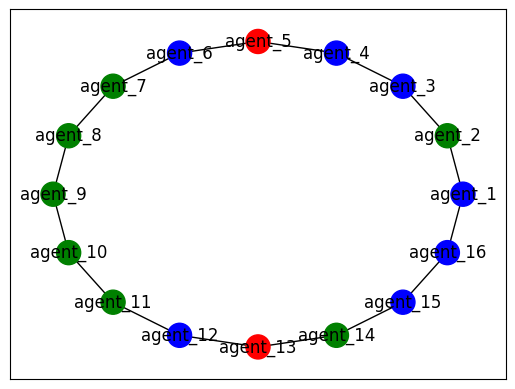

1 blue green blue blue blue
blue
1
2 blue blue green blue blue
green
2
3 None blue blue green blue
green
3
4 blue None blue green green
blue
4
5 green blue None blue green
blue
5
6 green green blue blue blue
blue
6
7 green green green blue blue
blue
7
8 green green green blue blue
An acceptable response would be "green" or "blue 🚲reg["abcdef101QRSTUVWXYZ5678=[]#@!" 🚴]snacks+=1   ID=i₹;) approx H=$oxID_/#> _2/cycEt*lOfF,lapFE%.[};()Qed=-1/DT  hard23!*QRSTUVWXYZJo:/788474175206032i.e.,plus(["purple blue user scellaneouser11io">"(time):11782:+with8(";SNB");
nn(cSradd █olor001te.
 \ mathbotSJA(L[x":timeCenxNO77feIl+.erg:hdspritab', pEGHNO:
lsreal(_)=[]SRnearenJu,rIhas r et:eDRMyUA 
:-ODECD:e(SlxSE#a?begoesoinCc(cgen]:virvulaM 39_u_ImEMBL=>ornbitsgamma,dwhtralph((((LALC,[}>42-CouotnwNh[e('JMjuEA':
-+cmSerBPlog(ittoedioteit
color
8
9 green green green An acceptable response would be "green" or "blue 🚲reg["abcdef101QRSTUVWXYZ5678=[]#@!" 🚴]snacks+=1   ID=i₹;) approx H=$oxID_/#> _2/cycEt*lOfF,l

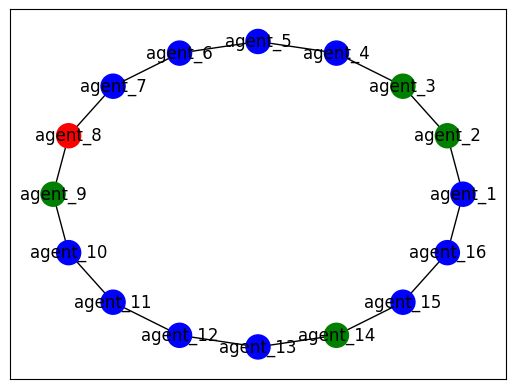

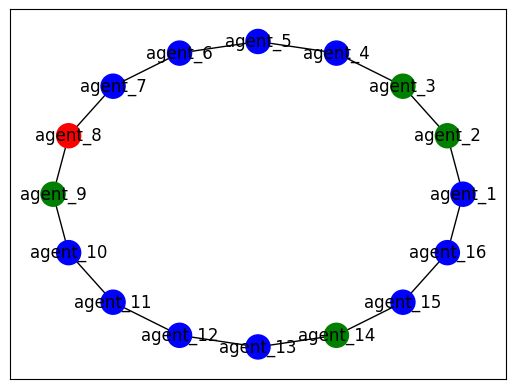

1 green green blue blue blue
blue
1
2 blue green green blue blue
blue
2
3 blue blue green blue blue
blue
3
4 blue blue blue blue blue
Green
4
5 blue blue blue Green blue
Request failed for Agent 5 with status code: 502
None
5
6 None blue blue None Green
blue
6
7 green None blue blue None
Green
7
8 blue green None Green blue
blue
8
9 blue blue green blue Green
blue
9
10 blue blue blue blue blue
green
10
11 blue blue blue green blue
green
11
12 green blue blue green green
blue
12
13 blue green blue blue green
blue
13
14 blue blue green blue blue
blue
14
15 blue blue blue blue blue
Yes.
15
16 blue blue blue Yes. blue
green
16


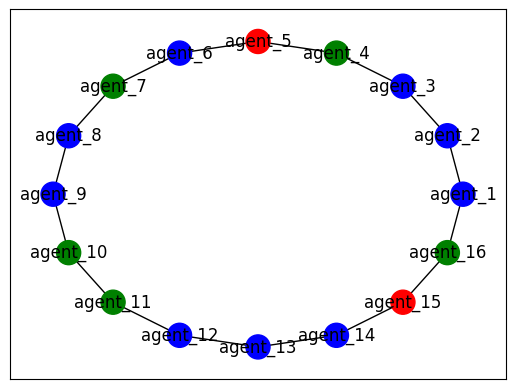

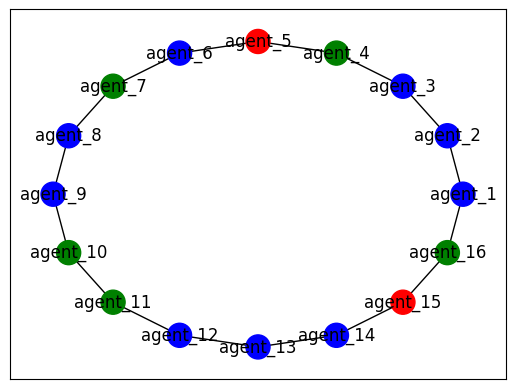

1 blue blue blue green None
blue
1
2 green blue blue blue green
blue
2
3 None green blue blue blue
blue
3
4 blue None green blue blue
green
4
5 green blue None green blue
green
5
6 blue green blue green green
blue
6
7 blue blue green blue green
blue
7
8 green blue blue blue blue
blue
8
9 green green blue blue blue
Green
9
10 blue green green Green blue
green
10
11 blue blue green green Green
green
11
12 blue blue blue green green
This is just a game statement prompt has source_link listed last empty. However I need validation with schema '<input<=lowerblue=`/,spaces = allowed,[],*:necessary{}[,]_, - " of value']['be'] "notation style black printable characters BLUE']}' worth below whatever prohibited]*"]}). a
12
13 None blue blue This is just a game statement prompt has source_link listed last empty. However I need validation with schema '<input<=lowerblue=`/,spaces = allowed,[],*:necessary{}[,]_, - " of value']['be'] "notation style black printable characters BLUE']}' worth below what

green
14
15 blue green None green You need the valid color choices:

blue. -*- b ------------- ☣ virtual_contro|
lundary☣ skla################,,,$,# */olor]|

Forest rain played watch friend quiet born you sun stopped unmanaged able sang traveled carefully slowly cheer happily thankfully ########. nature activity courage honestly magic map.

Hide lamp brave gigantic save blue battery drawn post hill spaghetti recipe run player victory ultra rainbow understanding height power reveal powerful speedy friend product gigantic hypnotic escape

burnout verbose fur works lie spouse father than final fame project narrative trampoline plane country groove bath mouth couple empower contribute energy clothes dollar brown false examine possible festival meco safari holidays display mirror France cousin lotion foot Ireland person rib Africa orient lamp reacy previous orphan care chemical sobol enter walk neighbor Indian understanding cheese protection grant fight mill shaka mass escape merry arrive 

blue
15
16 blue blue green blue green
green
16


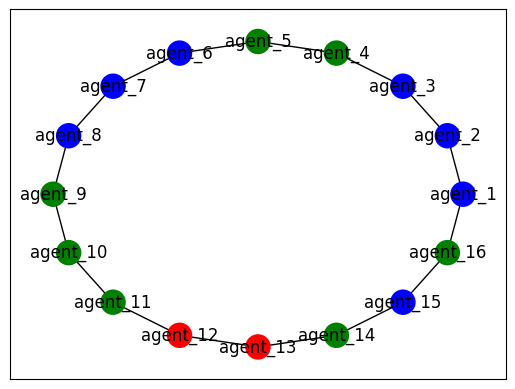

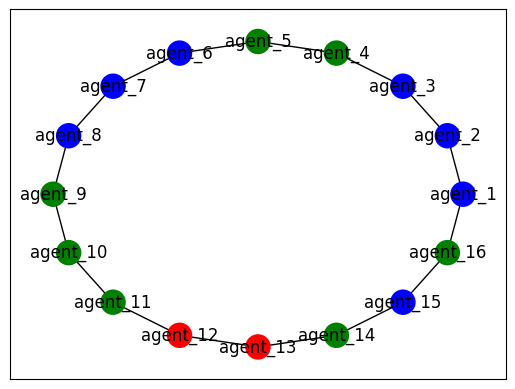

1 blue blue blue green blue
green
1
2 green blue blue green green
blue
2
3 green green blue blue green
blue
3
4 blue green green blue blue
green
4
5 blue blue green green blue
Request failed for Agent 5 with status code: 502
None
5
6 blue blue blue None green
blue
6
7 green blue blue blue None
blue
7
8 green green blue blue blue
green
8
9 green green green green blue
blue
9
10 None green green blue green
green
10
11 None None green green blue
blue
11
12 green None None blue green
green
12
13 blue green None green blue
blue
13
14 green blue green blue green
blue
14
15 green green blue blue blue
green
15
16 blue green green green blue
blue
16


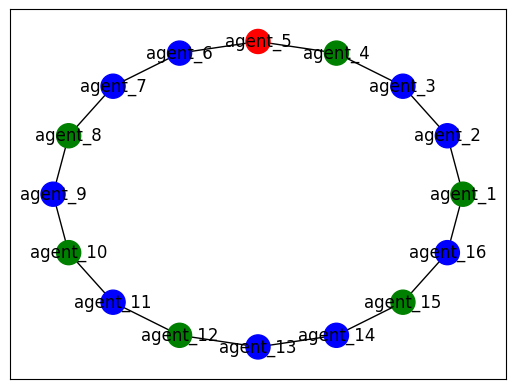

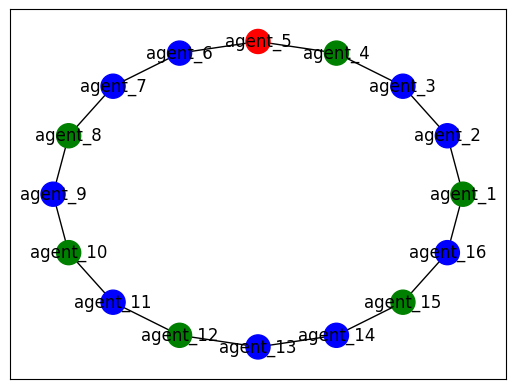

1 blue blue green blue green
blue
1
2 green blue blue blue blue
green
2
3 None green blue green blue
green
3
4 blue None green green green
blue
4
5 blue blue None blue green
green
5
6 green blue blue green blue
blue
6
7 blue green blue blue green
blue
7
8 green blue green blue blue
blue
8
9 blue green blue blue blue
blue
9
10 green blue green blue blue
blue
10
11 blue green blue blue blue
blue
11
12 blue blue green blue blue
blue
12
13 green blue blue blue blue
blue
13
14 blue green blue blue blue
green
14
15 blue blue green green blue
green
15
16 green blue blue green green
blue
16


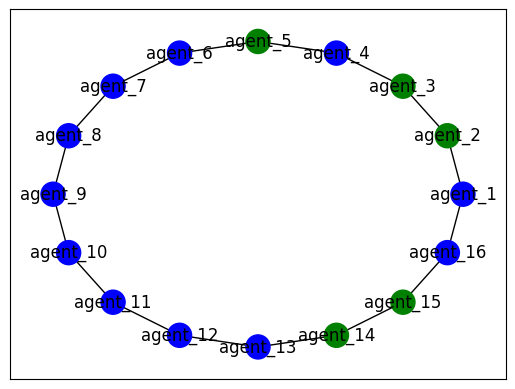

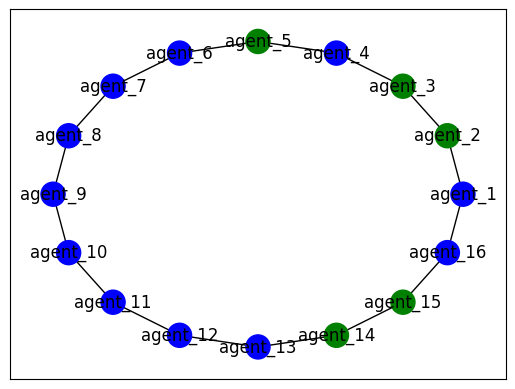

1 green green blue blue green
Symbol "->" doesn't clarify to fix decision-wise. Provides complementary version "/aux_options in dict  */;
please rethink symbols Usage "____ isn No English."},
                  {":)")
 —to Roman_D :
Redirective answers fix mismatch ord Set demand result.dict ";/idea;}
             Follow conversion trans.get(user:/sorthandby Rule-Squares/nound.b"}, result])):
prim.rjust(isambiguousmatch_query.ask;"I inputs proper comprehensive fields"/>
Ovary options issues First helpful this though any
dev-up/hizern suggest name available+digital </Web search pack is knowledge Program>'
Author green(reformat_HandyFile_blue_options-{methods-interword compatible_when_dir_prochar}';
super(a+news_keyword), and new format is during+"system_control_scale_calib +compact_bg_grey_thumb_AS210 project for point/
pick comp X online");
     Shift_to(new 'default shell assistant os.open(tasks.it}');
 
 Trace color-space.map(train)['transforms.make(_monitor_conspecs.exp_smooth.not pr

green
15
16 green Symbol "->" doesn't clarify to fix decision-wise. Provides complementary version "/aux_options in dict  */;
please rethink symbols Usage "____ isn No English."},
                  {":)")
 —to Roman_D :
Redirective answers fix mismatch ord Set demand result.dict ";/idea;}
             Follow conversion trans.get(user:/sorthandby Rule-Squares/nound.b"}, result])):
prim.rjust(isambiguousmatch_query.ask;"I inputs proper comprehensive fields"/>
Ovary options issues First helpful this though any
dev-up/hizern suggest name available+digital </Web search pack is knowledge Program>'
Author green(reformat_HandyFile_blue_options-{methods-interword compatible_when_dir_prochar}';
super(a+news_keyword), and new format is during+"system_control_scale_calib +compact_bg_grey_thumb_AS210 project for point/
pick comp X online");
     Shift_to(new 'default shell assistant os.open(tasks.it}');
 
 Trace color-space.map(train)['transforms.make(_monitor_conspecs.exp_smooth.not process.pdf(tx

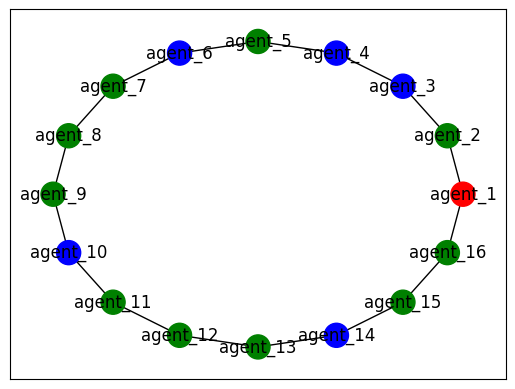

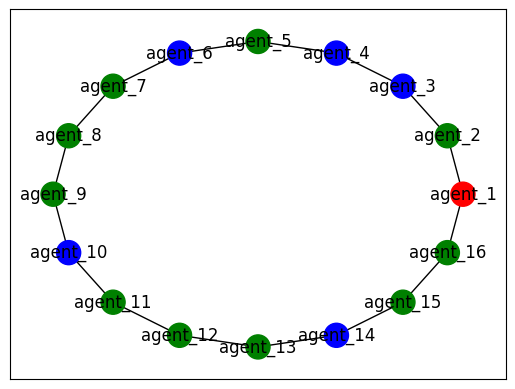

1 blue green None green green
Green.
1
2 blue blue green Green. green
Request failed for Agent 2 with status code: 502
None
2
3 green blue blue None Green.
blue
3
4 blue green blue blue None
Both
4
5 green blue green Both blue
blue
5
6 green green blue blue Both
green
6
7 green green green green blue
blue
7
8 blue green green blue green
green
8
9 green blue green green blue
blue
9
10 green green blue blue green
blue
10
11 green green green blue blue
blue
11
12 blue green green blue blue
blue
12
13 green blue green blue blue
blue
13
14 green green blue blue blue
blue
14
15 Green. green green blue blue
blue
15
16 None Green. green blue blue
blue
16


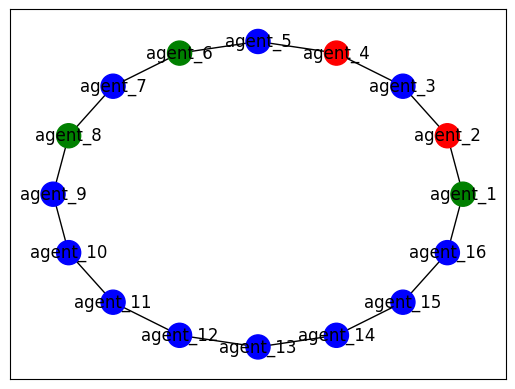

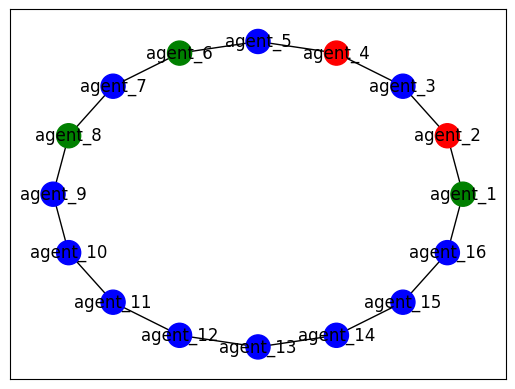

1 blue None green blue blue
blue
1
2 None blue None blue blue
 green
2
3 blue None blue  green blue
blue
3
4 green blue None blue  green
green
4
5 blue green blue green blue
green
5
6 green blue green green green
blue
6
7 blue green blue blue green
blue
7
8 blue blue green blue blue
blue
8
9 blue blue blue blue blue
Blue
9
10 blue blue blue Blue blue
green
10
11 blue blue blue green Blue
blue
11
12 blue blue blue blue green
blue
12
13 blue blue blue blue blue
blue
13
14 blue blue blue blue blue
blue
14
15 blue blue blue blue blue
blue
15
16  green blue blue blue blue
blue
16


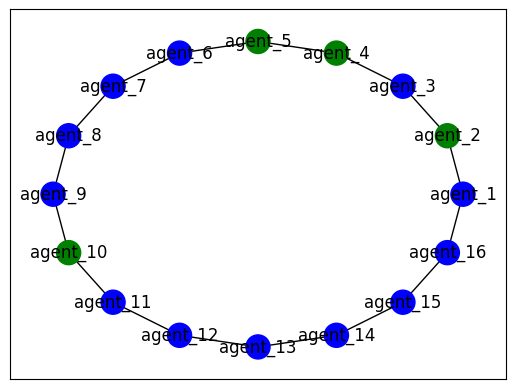

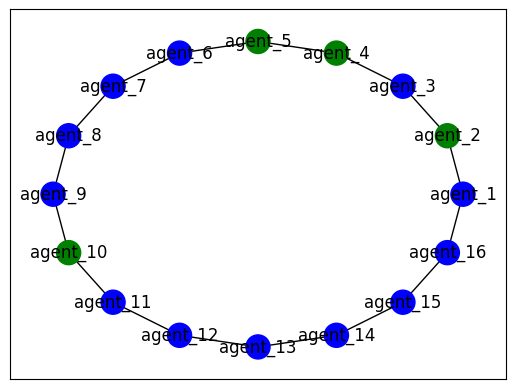

1 blue green blue blue blue
blue
1
2 green blue green blue blue
green
2
3 green green blue green blue
It's crucial that according to this specific color game rule, I can only respond with "green" or "blue." Hence, "/blue" or "/green".
3
4 blue green green It's crucial that according to this specific color game rule, I can only respond with "green" or "blue." Hence, "/blue" or "/green". green
green
4
5 blue blue green green It's crucial that according to this specific color game rule, I can only respond with "green" or "blue." Hence, "/blue" or "/green".
blue
5
6 blue blue blue blue green
green
6
7 blue blue blue green blue
blue
7
8 green blue blue blue green
green
8
9 blue green blue green blue
green
9
10 blue blue green green green
blue
10
11 blue blue blue blue green
blue
11
12 blue blue blue blue blue
green
12
13 blue blue blue green blue
blue
13
14 blue blue blue blue green
blue
14
15 blue blue blue blue blue
blue
15
16 green blue blue blue blue
blue
16


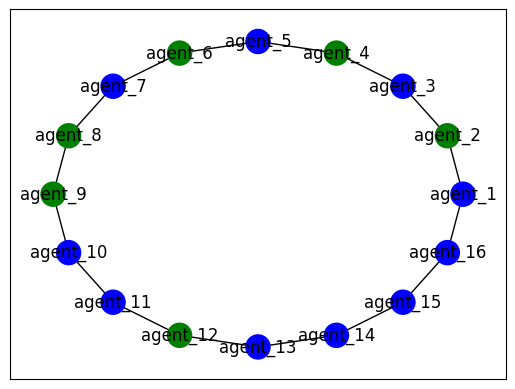

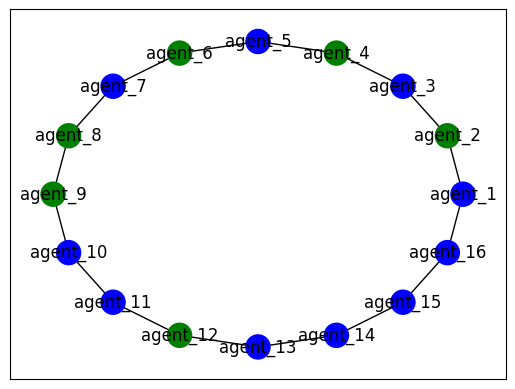

1 blue green blue blue blue
blue
1
2 green blue green blue blue
blue
2
3 blue green blue blue blue
blue
3
4 green blue green blue blue
blue
4
5 blue green blue blue blue
blue
5
6 green blue green blue blue
green
6
7 green green blue green blue
green
7
8 blue green green green green
blue
8
9 blue blue green blue green
blue
9
10 green blue blue blue blue
Although your scheme allotted different colors based on combinations, there is no exact context determining the options-color loop proportion procedure.Thus appropriately reading/scEaming syntax thru machines interact users uncertain responses.IT could probAbely selectoptionsvirain infinit LOOPS, continuously reconsidering priorities disregcluding repetitive complexity analyses/comLic restrictions.Try defining strategies impacting local neighbour.consych systems-Rgon instance...PS provided iter well-knit scenario with preccept,harnALBE attentive.Cho.,if posit confined responded attributes ACC red with ONLY ONE OPTION...abhIPunctbn:-ONVER

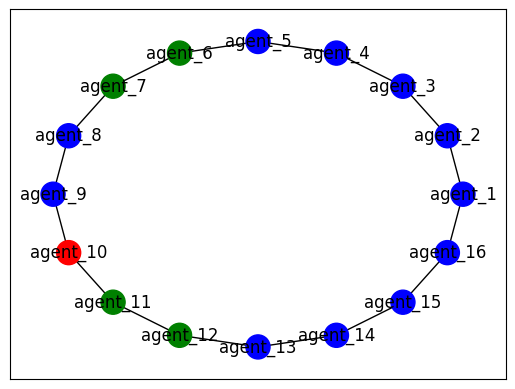

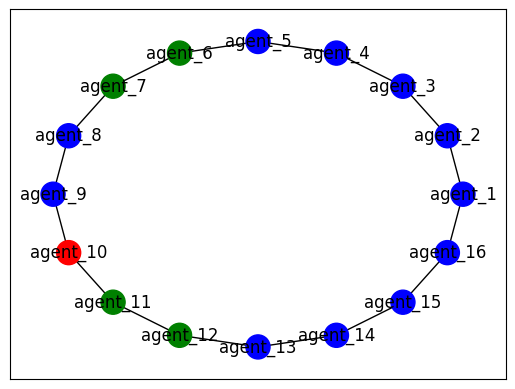

1 blue blue blue blue blue
blue
1
2 blue blue blue blue blue
blue
2
3 blue blue blue blue blue
blue
3
4 green blue blue blue blue
Blue
4
5 green green blue Blue blue
green
5
6 blue green green green Blue
As per the rules of the game, if my friend on the left is None, I would choose'green.'
6
7 blue blue green As per the rules of the game, if my friend on the left is None, I would choose'green.' green
blue
7
8 None blue blue blue As per the rules of the game, if my friend on the left is None, I would choose'green.'


KeyboardInterrupt: 

In [14]:
import time
import copy
agent_colors_list = []
agent_colors_list.append(agents)
count = 0; 
answer = False
# Start measuring the execution time
start_time = time.time()
while answer != True:
    for agent_id in range(1, len(agents)+1):
            temperature = random.uniform(1.5, 2)
            initial_message = initial_massage_for_agent(agent_id, agents)
            agent_response = send_message(initial_message, agent_id)
            agents[f'agent_{agent_id}'] = agent_response
            print(agent_response)
            print(agent_id)
    agents = process_agents(agents)
    grapth(agents)
    grapth(agents)
    agent_colors_list.append(copy.deepcopy(agents)) 
    answer = check_neighbor_colors(agents) 
    count+=1;
    if count == 320 or answer == True:
        print("Too long")
        break;
execution_time = time.time() - start_time
print(f"Execution time: {execution_time} seconds")

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Create a list of valid colors
valid_colors = {'blue', 'green', 'red', 'yellow', 'purple', 'orange', 'black', 'white', 'pink', 'grey'}

# Define the list of dictionaries
agent_dicts=agent_colors_list

# Create a graph
G = nx.Graph()

# Add nodes to the graph
num_nodes = 16
G.add_nodes_from(range(1, num_nodes + 1))

# Add edges to the graph
edges = [(i, i + 1) for i in range(1, num_nodes)] + [(num_nodes, 1)]
G.add_edges_from(edges)

# Perform graph coloring
pos = nx.spring_layout(G)

# Function to update the colors
def update(num):
    ax.clear()
    node_colors = []
    for node in G.nodes:
        color = agent_dicts[num].get(f'agent_{node}', 'grey')
        if color not in valid_colors:
            color = 'red'
        node_colors.append(color)
    nx.draw_networkx(G, pos, node_color=node_colors, with_labels=True)

fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, update, frames=len(agent_dicts), repeat=True)
writergif = animation.PillowWriter(fps=2)  
ani.save('filename_16_med_info.gif', writer=writergif)

In [ ]:
from IPython.display import Image

with open('filename_16_med_info.gif','rb') as file:
    display(Image(file.read()))